In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# 데이터 로드
df = pd.read_csv('./train.csv')

# 기본 통계량 확인
print("=== 기본 통계량 ===")
print(df['가격(백만원)'].describe())

# 1. 제조사별 평균 가격 분석
manufacturer_price = df.groupby('제조사')['가격(백만원)'].agg(['mean', 'count', 'std']).round(2)
manufacturer_price = manufacturer_price.sort_values('mean', ascending=False)
print("\n=== 제조사별 평균 가격 ===")
print(manufacturer_price)

# 2. 차량상태별 평균 가격
condition_price = df.groupby('차량상태')['가격(백만원)'].agg(['mean', 'count', 'std']).round(2)
print("\n=== 차량상태별 평균 가격 ===")
print(condition_price)

# 3. 구동방식별 평균 가격
drive_price = df.groupby('구동방식')['가격(백만원)'].agg(['mean', 'count', 'std']).round(2)
print("\n=== 구동방식별 평균 가격 ===")
print(drive_price)

# 4. 사고이력에 따른 가격 차이
accident_price = df.groupby('사고이력')['가격(백만원)'].agg(['mean', 'count', 'std']).round(2)
print("\n=== 사고이력별 평균 가격 ===")
print(accident_price)

# 5. 연속형 변수와 가격의 상관관계
numeric_cols = ['배터리용량', '주행거리(km)', '보증기간(년)', '연식(년)']
correlations = df[numeric_cols + ['가격(백만원)']].corr()['가격(백만원)'].sort_values(ascending=False)
print("\n=== 연속형 변수와 가격의 상관관계 ===")
print(correlations)

# 6. 모델별 평균 가격 (상위 10개)
model_price = df.groupby('모델')['가격(백만원)'].agg(['mean', 'count', 'std']).round(2)
model_price = model_price.sort_values('mean', ascending=False)
print("\n=== 모델별 평균 가격 (상위 10개) ===")
print(model_price.head(10))

# 7. 주행거리와 가격의 관계 분석
distance_corr = stats.pearsonr(df['주행거리(km)'], df['가격(백만원)'])
print("\n=== 주행거리와 가격의 상관관계 ===")
print(f"Pearson correlation: {distance_corr[0]:.4f}")
print(f"P-value: {distance_corr[1]:.4f}")

# 8. 배터리 용량과 가격의 관계 분석
# 결측치 제외
battery_price = df[df['배터리용량'].notna()]
battery_corr = stats.pearsonr(battery_price['배터리용량'], battery_price['가격(백만원)'])
print("\n=== 배터리용량과 가격의 상관관계 ===")
print(f"Pearson correlation: {battery_corr[0]:.4f}")
print(f"P-value: {battery_corr[1]:.4f}")

# 9. 보증기간과 가격의 관계
warranty_corr = stats.pearsonr(df['보증기간(년)'], df['가격(백만원)'])
print("\n=== 보증기간과 가격의 상관관계 ===")
print(f"Pearson correlation: {warranty_corr[0]:.4f}")
print(f"P-value: {warranty_corr[1]:.4f}")

# 10. 결측치 현황 파악
missing_values = df.isnull().sum()
print("\n=== 결측치 현황 ===")
print(missing_values[missing_values > 0])

=== 기본 통계량 ===
count    7497.000000
mean       62.331949
std        36.646759
min         9.000000
25%        34.390000
50%        56.000000
75%        80.050000
max       161.090000
Name: 가격(백만원), dtype: float64

=== 제조사별 평균 가격 ===
       mean  count    std
제조사                      
P사   131.99   1071  21.45
A사    75.13   1142  17.73
T사    70.15   1109  13.05
B사    55.21   1169  23.42
V사    38.41    605   2.80
H사    31.31   1237   7.28
K사    30.78   1164   9.71

=== 차량상태별 평균 가격 ===
             mean  count    std
차량상태                           
Brand New   65.09   3380  34.65
Nearly New  60.50   2059  38.41
Pre-Owned   59.63   2058  37.71

=== 구동방식별 평균 가격 ===
       mean  count    std
구동방식                     
AWD   72.29   5167  38.04
FWD   28.11   1267   9.01
RWD   54.70   1063  20.15

=== 사고이력별 평균 가격 ===
       mean  count    std
사고이력                     
No    62.29   7154  36.66
Yes   63.11    343  36.42

=== 연속형 변수와 가격의 상관관계 ===
가격(백만원)     1.000000
배터리용량       0.431668
주행거리(km)

In [2]:
import pandas as pd
import numpy as np

def analyze_model_prices(df):
    # 모델별 기본 통계량 계산
    model_stats = df.groupby('모델').agg({
        '가격(백만원)': ['count', 'mean', 'std', 'min', 'max'],
        '제조사': lambda x: x.iloc[0]  # 해당 모델의 제조사 정보
    }).round(2)
    
    # 멀티인덱스 칼럼을 단일 인덱스로 변경
    model_stats.columns = ['count', 'mean', 'std', 'min', 'max', '제조사']
    
    # 평균 가격 기준으로 정렬
    model_stats = model_stats.sort_values('mean', ascending=False)
    
    # 제조사별 모델 수 계산
    manufacturer_counts = df['제조사'].value_counts()
    
    print("=== 모델별 가격 통계 ===")
    print(model_stats)
    
    print("\n=== 제조사별 모델 수 ===")
    print(manufacturer_counts)
    
    # 제조사별 평균 가격
    manufacturer_prices = df.groupby('제조사')['가격(백만원)'].agg(['mean', 'std', 'count']).round(2)
    manufacturer_prices = manufacturer_prices.sort_values('mean', ascending=False)
    
    print("\n=== 제조사별 평균 가격 ===")
    print(manufacturer_prices)
    
    # 가격 구간별 모델 분포
    price_bins = [0, 40, 60, 80, 100, 150, float('inf')]
    price_labels = ['0-40', '40-60', '60-80', '80-100', '100-150', '150+']
    
    df['price_range'] = pd.cut(df['가격(백만원)'], bins=price_bins, labels=price_labels)
    price_distribution = df.groupby(['제조사', 'price_range']).size().unstack(fill_value=0)
    
    print("\n=== 제조사별 가격대 분포 ===")
    print(price_distribution)

# 데이터 로드 및 분석 실행
train_data = pd.read_csv('train.csv')
analyze_model_prices(train_data)

=== 모델별 가격 통계 ===
        count    mean    std     min     max 제조사
모델                                              
TayGTS    375  158.30   3.02  151.00  161.09  P사
TayCT     335  126.31   4.48  119.00  132.00  P사
Tay       361  109.93  10.04   95.00  122.07  P사
RSeTGT    385   98.80   2.09   94.00  101.19  A사
MX        264   83.05   8.15   70.89   94.75  T사
iX        367   80.03   0.57   78.92   81.15  B사
MS        277   74.54   7.30   63.11   84.55  T사
MY        289   72.05   5.31   62.81   78.99  T사
eT        379   68.10   5.35   58.92   74.75  A사
i5        414   62.87   1.76   59.76   66.06  B사
Q4eT      378   58.07   2.14   52.01   60.00  A사
M3        279   51.63   3.04   45.72   55.00  T사
EV6       369   44.20   3.63   39.75   49.08  K사
ID4       605   38.41   2.80   32.81   42.11  V사
ION6      379   38.10   0.74   36.35   39.00  H사
ION5      353   35.07   0.70   33.32   36.00  H사
Niro      398   26.97   2.08   20.61   29.12  K사
KNE       365   25.74   2.60   20.55   29.19  H사
i3

C:\Users\Admin\AppData\Local\Temp\ipykernel_33196\2402902451.py:38: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  price_distribution = df.groupby(['제조사', 'price_range']).size().unstack(fill_value=0)



=== 엔트리 세그먼트(1) 이상치 분석 ===

=== RSeTGT 모델 분석 ===
전체 데이터 수: 385
이상치 데이터 수: 55
이상치 비율: 14.29%

기본 통계:
Q1: 98.02, Q3: 100.10, IQR: 2.08
하한 경계: 94.90
상한 경계: 103.22

차량상태별 이상치 분포:
차량상태
Pre-Owned    55
Name: count, dtype: int64

사고이력별 이상치 분포:
사고이력
No     53
Yes     2
Name: count, dtype: int64

이상치 상세 데이터:
      가격(백만원)  주행거리(km)  배터리용량       차량상태 사고이력  연식(년)  보증기간(년)
3231    94.89    148828  78.23  Pre-Owned   No      0        0
128     94.89    129869  78.23  Pre-Owned  Yes      0        0
4508    94.83     53956    NaN  Pre-Owned   No      0        0
4906    94.82    140373    NaN  Pre-Owned   No      0        0
1655    94.81    129550    NaN  Pre-Owned   No      0        0
33      94.79    128546    NaN  Pre-Owned   No      0        0
968     94.78    171887    NaN  Pre-Owned   No      0        0
2547    94.77     55883    NaN  Pre-Owned   No      0        0
3921    94.74    187284    NaN  Pre-Owned   No      0        0
7080    94.71    108152    NaN  Pre-Owned   No      0        0
5193 

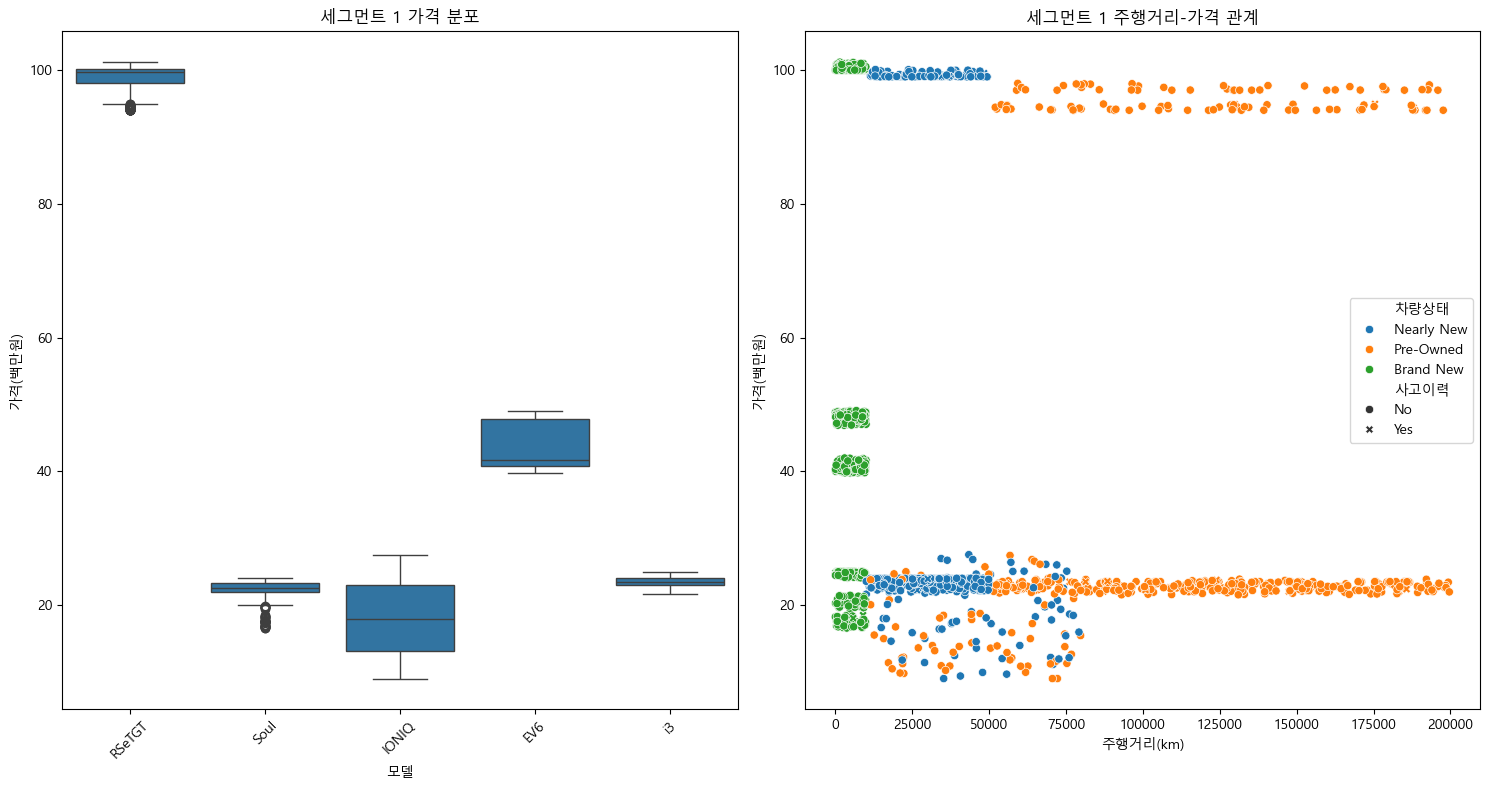


=== 준프리미엄 세그먼트(6) 이상치 분석 ===


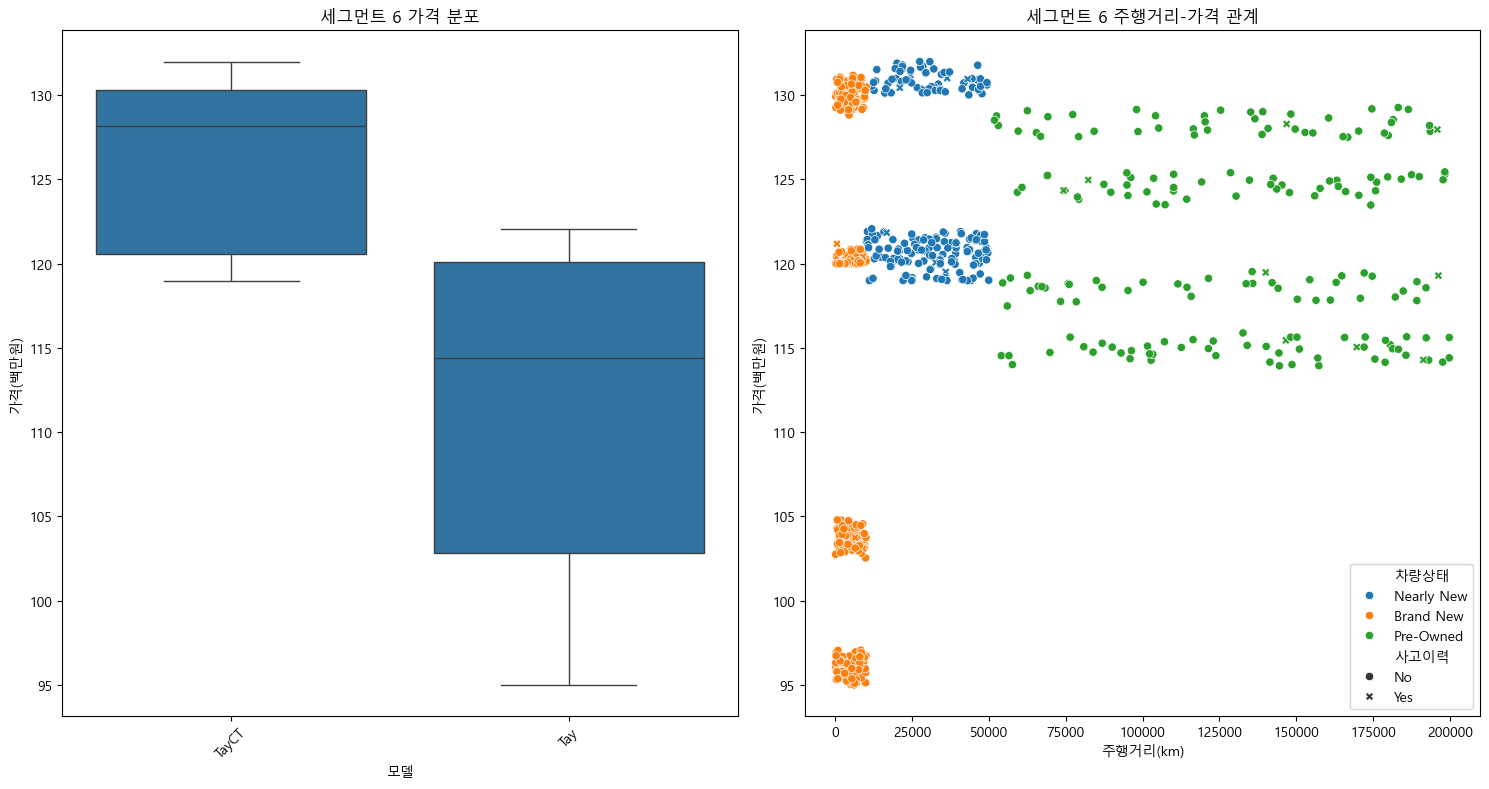

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

def get_detailed_segment(model_name):
    """세분화된 모델 세그먼트 분류"""
    premium = ['TayGTS']
    semi_premium = ['TayCT', 'Tay']
    luxury = ['RSeGT', 'MX', 'iX']
    upper_mid = ['MS', 'MY', 'eT', 'i5']
    mid = ['Q4eT', 'M3', 'i4']
    basic = ['ID4', 'ION6', 'ION5', 'Niro', 'KNE']
    entry = ['i3', 'Soul', 'IONIQ']
    
    if model_name in premium:
        return 7  # 프리미엄
    elif model_name in semi_premium:
        return 6  # 준프리미엄
    elif model_name in luxury:
        return 5  # 고급
    elif model_name in upper_mid:
        return 4  # 중상급
    elif model_name in mid:
        return 3  # 중급
    elif model_name in basic:
        return 2  # 보급형
    else:
        return 1  # 엔트리

def analyze_segment_outliers(df, segment_num):
    """세그먼트별 이상치 분석"""
    # 세그먼트 할당
    df['segment'] = df['모델'].apply(get_detailed_segment)
    segment_data = df[df['segment'] == segment_num]
    
    segment_names = {
        1: "엔트리",
        2: "보급형",
        3: "중급",
        4: "중상급",
        5: "고급",
        6: "준프리미엄",
        7: "프리미엄"
    }
    
    print(f"\n=== {segment_names[segment_num]} 세그먼트({segment_num}) 이상치 분석 ===")
    
    for model in segment_data['모델'].unique():
        model_data = segment_data[segment_data['모델'] == model]
        Q1 = model_data['가격(백만원)'].quantile(0.25)
        Q3 = model_data['가격(백만원)'].quantile(0.75)
        IQR = Q3 - Q1
        
        outliers = model_data[
            (model_data['가격(백만원)'] < (Q1 - 1.5 * IQR)) | 
            (model_data['가격(백만원)'] > (Q3 + 1.5 * IQR))
        ]
        
        if len(outliers) > 0:
            print(f"\n=== {model} 모델 분석 ===")
            print(f"전체 데이터 수: {len(model_data)}")
            print(f"이상치 데이터 수: {len(outliers)}")
            print(f"이상치 비율: {(len(outliers)/len(model_data)*100):.2f}%")
            print(f"\n기본 통계:")
            print(f"Q1: {Q1:.2f}, Q3: {Q3:.2f}, IQR: {IQR:.2f}")
            print(f"하한 경계: {(Q1 - 1.5 * IQR):.2f}")
            print(f"상한 경계: {(Q3 + 1.5 * IQR):.2f}")
            
            # 차량상태별 이상치 분포
            condition_dist = outliers['차량상태'].value_counts()
            print("\n차량상태별 이상치 분포:")
            print(condition_dist)
            
            # 사고이력별 이상치 분포
            accident_dist = outliers['사고이력'].value_counts()
            print("\n사고이력별 이상치 분포:")
            print(accident_dist)
            
            # 이상치 상세 정보
            print("\n이상치 상세 데이터:")
            columns = ['가격(백만원)', '주행거리(km)', '배터리용량', '차량상태', 
                      '사고이력', '연식(년)', '보증기간(년)']
            print(outliers[columns].sort_values('가격(백만원)', ascending=False).round(2))
            
            # 상관관계 분석
            print("\n이상치 데이터 상관관계:")
            numeric_cols = ['가격(백만원)', '주행거리(km)', '배터리용량', '연식(년)', '보증기간(년)']
            correlations = outliers[numeric_cols].corr()['가격(백만원)'].round(3)
            print(correlations)

def visualize_outliers(df, segment_num):
    """이상치 시각화"""
    df['segment'] = df['모델'].apply(get_detailed_segment)
    segment_data = df[df['segment'] == segment_num]
    
    plt.figure(figsize=(15, 8))
    
    # 박스플롯
    plt.subplot(1, 2, 1)
    sns.boxplot(x='모델', y='가격(백만원)', data=segment_data)
    plt.title(f'세그먼트 {segment_num} 가격 분포')
    plt.xticks(rotation=45)
    
    # 산점도
    plt.subplot(1, 2, 2)
    sns.scatterplot(data=segment_data, x='주행거리(km)', y='가격(백만원)', 
                   hue='차량상태', style='사고이력')
    plt.title(f'세그먼트 {segment_num} 주행거리-가격 관계')
    
    plt.tight_layout()
    plt.show()

# 데이터 로드 및 분석 실행
train_data = pd.read_csv('train.csv')

# 엔트리(1)와 준프리미엄(6) 세그먼트 분석
for segment_num in [1, 6]:
    analyze_segment_outliers(train_data, segment_num)
    visualize_outliers(train_data, segment_num)

In [4]:
import pandas as pd
import numpy as np

def analyze_missing_values(model_name, df):
    """모델별 결측치 상세 분석"""
    print(f"\n=== {model_name} 모델 결측치 분석 ===")
    
    # 해당 모델 데이터 추출
    model_data = df[df['모델'] == model_name]
    
    # 기본 통계
    print(f"전체 데이터 수: {len(model_data)}")
    
    # 컬럼별 결측치 개수와 비율
    missing_stats = model_data.isnull().sum()
    missing_pcts = (missing_stats / len(model_data) * 100).round(2)
    print("\n결측치 현황:")
    for col in model_data.columns:
        if missing_stats[col] > 0:
            print(f"{col}: {missing_stats[col]}개 ({missing_pcts[col]}%)")
    
    # 배터리용량 결측치 특성 분석
    if missing_stats['배터리용량'] > 0:
        print("\n배터리용량 결측치 세부 분석:")
        
        # 차량상태별 결측치
        print("\n차량상태별 결측 현황:")
        missing_by_condition = model_data[model_data['배터리용량'].isnull()]['차량상태'].value_counts()
        total_by_condition = model_data['차량상태'].value_counts()
        for condition in missing_by_condition.index:
            missing_count = missing_by_condition[condition]
            total_count = total_by_condition[condition]
            print(f"{condition}: {missing_count}/{total_count} ({(missing_count/total_count*100):.2f}%)")
        
        # 결측치 있는 데이터와 없는 데이터의 특성 비교
        print("\n결측치 유무에 따른 평균값 비교:")
        comparison_cols = ['주행거리(km)', '연식(년)', '보증기간(년)', '가격(백만원)']
        for col in comparison_cols:
            missing_mean = model_data[model_data['배터리용량'].isnull()][col].mean()
            non_missing_mean = model_data[model_data['배터리용량'].notnull()][col].mean()
            print(f"\n{col}:")
            print(f"- 결측치 있는 데이터 평균: {missing_mean:.2f}")
            print(f"- 결측치 없는 데이터 평균: {non_missing_mean:.2f}")

# 데이터 로드
train_data = pd.read_csv('train.csv')

# 문제가 되는 모델들 분석
problem_models = ['IONIQ', 'TayCT', 'Tay']
for model in problem_models:
    analyze_missing_values(model, train_data)


=== IONIQ 모델 결측치 분석 ===
전체 데이터 수: 140

결측치 현황:
배터리용량: 32개 (22.86%)

배터리용량 결측치 세부 분석:

차량상태별 결측 현황:
Pre-Owned: 17/74 (22.97%)
Nearly New: 15/66 (22.73%)

결측치 유무에 따른 평균값 비교:

주행거리(km):
- 결측치 있는 데이터 평균: 45870.00
- 결측치 없는 데이터 평균: 48260.17

연식(년):
- 결측치 있는 데이터 평균: 0.88
- 결측치 없는 데이터 평균: 1.02

보증기간(년):
- 결측치 있는 데이터 평균: 1.94
- 결측치 없는 데이터 평균: 1.99

가격(백만원):
- 결측치 있는 데이터 평균: 17.67
- 결측치 없는 데이터 평균: 18.09

=== TayCT 모델 결측치 분석 ===
전체 데이터 수: 335

결측치 현황:
배터리용량: 127개 (37.91%)

배터리용량 결측치 세부 분석:

차량상태별 결측 현황:
Brand New: 127/149 (85.23%)

결측치 유무에 따른 평균값 비교:

주행거리(km):
- 결측치 있는 데이터 평균: 4870.23
- 결측치 없는 데이터 평균: 73204.05

연식(년):
- 결측치 있는 데이터 평균: 0.00
- 결측치 없는 데이터 평균: 0.38

보증기간(년):
- 결측치 있는 데이터 평균: 2.00
- 결측치 없는 데이터 평균: 1.62

가격(백만원):
- 결측치 있는 데이터 평균: 125.75
- 결측치 없는 데이터 평균: 126.66

=== Tay 모델 결측치 분석 ===
전체 데이터 수: 361

결측치 현황:
배터리용량: 136개 (37.67%)

배터리용량 결측치 세부 분석:

차량상태별 결측 현황:
Brand New: 136/168 (80.95%)

결측치 유무에 따른 평균값 비교:

주행거리(km):
- 결측치 있는 데이터 평균: 4984.38
- 결측치 없는 데이터 평균: 69077.18

연식(년):
- 결측치 있는 데

In [5]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from scipy.optimize import minimize

class IndependentPredictor:
    def __init__(self):
        self.label_encoders = {}
        self.models = {}
        self.kf = KFold(n_splits=5, shuffle=True, random_state=42)
        
    def optimize_hyperparameters(self, X, y, model_type='rf', data_size='small'):
        """
        GridSearchCV를 통한 하이퍼파라미터 최적화
        """
        if model_type == 'rf':
            model = RandomForestRegressor(random_state=42)
            if data_size == 'small':  # 100개 이하
                param_grid = {
                    'n_estimators': [100, 200],
                    'max_depth': [3, 4],
                    'min_samples_split': [4, 5],
                    'min_samples_leaf': [3, 4]
                }
            else:
                param_grid = {
                    'n_estimators': [200, 300, 400],
                    'max_depth': [4, 5, 6],
                    'min_samples_split': [2, 4, 5],
                    'min_samples_leaf': [2, 3, 4]
                }
        else:  # hgb
            model = HistGradientBoostingRegressor(random_state=42)
            if data_size == 'small':
                param_grid = {
                    'max_iter': [1000, 1500],
                    'learning_rate': [0.005, 0.007],
                    'max_depth': [3, 4],
                    'l2_regularization': [2.5, 3.0]
                }
            else:
                param_grid = {
                    'max_iter': [1500, 2000, 2500],
                    'learning_rate': [0.003, 0.005, 0.007],
                    'max_depth': [4, 5, 6],
                    'l2_regularization': [2.0, 2.5, 3.0]
                }
        
        grid_search = GridSearchCV(
            estimator=model,
            param_grid=param_grid,
            cv=self.kf,
            scoring='neg_root_mean_squared_error',
            n_jobs=-1
        )
        
        grid_search.fit(X, y)
        return grid_search.best_params_
    
    def optimize_weights(self, X, y, rf_model, hgb_model):
        """
        앙상블 가중치 최적화
        """
        def objective(weights):
            w_rf, w_hgb = weights
            pred = w_rf * rf_model.predict(X) + w_hgb * hgb_model.predict(X)
            return np.sqrt(mean_squared_error(y, pred))
        
        constraints = ({'type': 'eq', 'fun': lambda w: sum(w) - 1})
        bounds = [(0, 1), (0, 1)]
        
        result = minimize(
            objective,
            x0=[0.5, 0.5],
            bounds=bounds,
            constraints=constraints
        )
        
        return {'rf': result.x[0], 'hgb': result.x[1]}
    
    def initialize_label_encoders(self, train_df, test_df=None):
        """레이블 인코더 초기화"""
        for col in ['제조사', '모델', '구동방식', '차량상태']:
            self.label_encoders[col] = LabelEncoder()
            unique_values = set(train_df[col].unique())
            
            if test_df is not None:
                unique_values.update(test_df[col].unique())
            
            self.label_encoders[col].fit(sorted(list(unique_values)))
    
    def prepare_features(self, df):
        """특성 준비"""
        features = df.copy()
        
        # 범주형 변수 인코딩
        for col in ['제조사', '모델', '구동방식', '차량상태']:
            features[f'{col}_encoded'] = self.label_encoders[col].transform(features[col])
        
        # 기본 특성
        feature_cols = [
            '제조사_encoded', '모델_encoded', '구동방식_encoded', '차량상태_encoded',
            '배터리용량', '주행거리(km)', '보증기간(년)', '연식(년)'
        ]
        
        return features[feature_cols]
    
    def analyze_missing_values(self, train_df):
        """결측치 분석"""
        for model_name in ['IONIQ', 'TayCT', 'Tay']:
            model_data = train_df[train_df['모델'] == model_name]
            print(f"\n=== {model_name} 모델 결측치 분석 ===")
            print(f"전체 데이터 수: {len(model_data)}")
            
            # 결측치 현황
            missing_counts = model_data['배터리용량'].isnull().sum()
            print(f"결측치 현황:")
            print(f"배터리용량: {missing_counts}개 ({missing_counts/len(model_data)*100:.2f}%)")
            
            # 결측치 세부 분석
            print(f"배터리용량 결측치 세부 분석:")
            print("차량상태별 결측 현황:")
            for condition in model_data['차량상태'].unique():
                condition_data = model_data[model_data['차량상태'] == condition]
                missing_count = condition_data['배터리용량'].isnull().sum()
                if missing_count > 0:
                    print(f"{condition}: {missing_count}/{len(condition_data)} "
                          f"({missing_count/len(condition_data)*100:.2f}%)")
            
            # 결측치 유무에 따른 평균값 비교
            print("결측치 유무에 따른 평균값 비교:")
            numeric_cols = ['주행거리(km)', '연식(년)', '보증기간(년)', '가격(백만원)']
            for col in numeric_cols:
                missing_mean = model_data[model_data['배터리용량'].isnull()][col].mean()
                non_missing_mean = model_data[model_data['배터리용량'].notnull()][col].mean()
                print(f"{col}:")
                print(f"- 결측치 있는 데이터 평균: {missing_mean:.2f}")
                print(f"- 결측치 없는 데이터 평균: {non_missing_mean:.2f}")
    
    def fit(self, train_df, test_df=None):
        """모델 학습"""
        self.initialize_label_encoders(train_df, test_df)
        self.analyze_missing_values(train_df)
        
        for model_name in ['IONIQ', 'TayCT', 'Tay']:
            print(f"\n=== {model_name} 모델 학습 ===")
            model_data = train_df[train_df['모델'] == model_name].copy()
            self.models[model_name] = {'missing': {}, 'non_missing': {}}
            
            # 결측치 있는 데이터와 없는 데이터 분리
            missing_mask = model_data['배터리용량'].isnull()
            
            for data_type in ['missing', 'non_missing']:
                current_data = model_data[missing_mask] if data_type == 'missing' else model_data[~missing_mask]
                
                if len(current_data) > 0:
                    X = self.prepare_features(current_data)
                    y = current_data['가격(백만원)']
                    
                    # 데이터 크기에 따른 최적화 설정
                    data_size = 'small' if len(current_data) < 100 else 'large'
                    
                    # RandomForest 최적화 및 학습
                    rf_params = self.optimize_hyperparameters(X, y, 'rf', data_size)
                    rf_model = RandomForestRegressor(**rf_params, random_state=42)
                    rf_model.fit(X, y)
                    
                    # HistGradientBoosting 최적화 및 학습
                    hgb_params = self.optimize_hyperparameters(X, y, 'hgb', data_size)
                    hgb_model = HistGradientBoostingRegressor(**hgb_params, random_state=42)
                    hgb_model.fit(X, y)
                    
                    # 앙상블 가중치 최적화
                    weights = self.optimize_weights(X, y, rf_model, hgb_model)
                    
                    # 모델 및 파라미터 저장
                    self.models[model_name][data_type] = {
                        'rf': rf_model,
                        'hgb': hgb_model,
                        'weights': weights,
                        'rf_params': rf_params,
                        'hgb_params': hgb_params
                    }
                    
                    # 성능 평가
                    y_pred = (weights['rf'] * rf_model.predict(X) + 
                             weights['hgb'] * hgb_model.predict(X))
                    rmse = np.sqrt(mean_squared_error(y, y_pred))
                    r2 = r2_score(y, y_pred)
                    
                    print(f"\n{data_type} 데이터 성능:")
                    print(f"데이터 수: {len(current_data)}")
                    print(f"RMSE: {rmse:.4f}")
                    print(f"R2: {r2:.4f}")
                    print(f"최적 가중치: RF={weights['rf']:.2f}, HGB={weights['hgb']:.2f}")
                    print("\n최적 파라미터:")
                    print("RF:", rf_params)
                    print("HGB:", hgb_params)
    
    def predict(self, test_df):
        """예측 수행"""
        predictions = pd.Series(index=test_df.index, dtype=float)
        
        for model_name in ['IONIQ', 'TayCT', 'Tay']:
            model_mask = test_df['모델'] == model_name
            if sum(model_mask) > 0:
                model_data = test_df[model_mask].copy()
                missing_mask = model_data['배터리용량'].isnull()
                
                for data_type in ['missing', 'non_missing']:
                    current_mask = model_mask & (missing_mask if data_type == 'missing' else ~missing_mask)
                    if sum(current_mask) > 0 and data_type in self.models[model_name]:
                        X = self.prepare_features(test_df[current_mask])
                        model_info = self.models[model_name][data_type]
                        
                        predictions[current_mask] = (
                            model_info['weights']['rf'] * model_info['rf'].predict(X) +
                            model_info['weights']['hgb'] * model_info['hgb'].predict(X)
                        )
        
        return predictions

# 모델 학습 및 예측
if __name__ == "__main__":
    # 데이터 로드
    train_data = pd.read_csv('train.csv')
    test_data = pd.read_csv('test.csv')
    
    # IONIQ, TayCT, Tay 모델만 선택
    train_models = train_data[train_data['모델'].isin(['IONIQ', 'TayCT', 'Tay'])]
    test_models = test_data[test_data['모델'].isin(['IONIQ', 'TayCT', 'Tay'])]
    
    # 모델 학습
    predictor = IndependentPredictor()
    predictor.fit(train_models, test_models)
    
    # 예측
    predictions = predictor.predict(test_models)
    
    # 결과 저장
    submission = pd.DataFrame({
        'ID': test_models['ID'],
        '가격(백만원)': predictions
    })
    
    submission.to_csv('independent_model_submission.csv', index=False)


=== IONIQ 모델 결측치 분석 ===
전체 데이터 수: 140
결측치 현황:
배터리용량: 32개 (22.86%)
배터리용량 결측치 세부 분석:
차량상태별 결측 현황:
Nearly New: 15/66 (22.73%)
Pre-Owned: 17/74 (22.97%)
결측치 유무에 따른 평균값 비교:
주행거리(km):
- 결측치 있는 데이터 평균: 45870.00
- 결측치 없는 데이터 평균: 48260.17
연식(년):
- 결측치 있는 데이터 평균: 0.88
- 결측치 없는 데이터 평균: 1.02
보증기간(년):
- 결측치 있는 데이터 평균: 1.94
- 결측치 없는 데이터 평균: 1.99
가격(백만원):
- 결측치 있는 데이터 평균: 17.67
- 결측치 없는 데이터 평균: 18.09

=== TayCT 모델 결측치 분석 ===
전체 데이터 수: 335
결측치 현황:
배터리용량: 127개 (37.91%)
배터리용량 결측치 세부 분석:
차량상태별 결측 현황:
Brand New: 127/149 (85.23%)
결측치 유무에 따른 평균값 비교:
주행거리(km):
- 결측치 있는 데이터 평균: 4870.23
- 결측치 없는 데이터 평균: 73204.05
연식(년):
- 결측치 있는 데이터 평균: 0.00
- 결측치 없는 데이터 평균: 0.38
보증기간(년):
- 결측치 있는 데이터 평균: 2.00
- 결측치 없는 데이터 평균: 1.62
가격(백만원):
- 결측치 있는 데이터 평균: 125.75
- 결측치 없는 데이터 평균: 126.66

=== Tay 모델 결측치 분석 ===
전체 데이터 수: 361
결측치 현황:
배터리용량: 136개 (37.67%)
배터리용량 결측치 세부 분석:
차량상태별 결측 현황:
Brand New: 136/168 (80.95%)
결측치 유무에 따른 평균값 비교:
주행거리(km):
- 결측치 있는 데이터 평균: 4984.38
- 결측치 없는 데이터 평균: 69077.18
연식(년):
- 결측치 있는 데이터 평균: 0.00
- 결측치 없는 데

In [6]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

class IONIQAnalyzer:
    def __init__(self):
        self.label_encoders = {}
        
    def initialize_label_encoders(self, train_df, test_df=None):
        """레이블 인코더 초기화"""
        for col in ['제조사', '모델', '구동방식', '차량상태']:
            self.label_encoders[col] = LabelEncoder()
            unique_values = set(train_df[col].unique())
            
            if test_df is not None:
                unique_values.update(test_df[col].unique())
            
            self.label_encoders[col].fit(sorted(list(unique_values)))
            
    def prepare_features(self, df):
        """특성 준비"""
        features = df.copy()
        
        # 범주형 변수 인코딩
        for col in ['제조사', '모델', '구동방식', '차량상태']:
            features[f'{col}_encoded'] = self.label_encoders[col].transform(features[col])
        
        # 기본 특성
        feature_cols = [
            '제조사_encoded', '모델_encoded', '구동방식_encoded', '차량상태_encoded',
            '배터리용량', '주행거리(km)', '보증기간(년)', '연식(년)'
        ]
        
        return features[feature_cols]
    
    def analyze_price_distribution(self, ioniq_data):
        """가격 분포 분석"""
        print("\n=== 가격 분포 분석 ===")
        print(f"평균: {ioniq_data['가격(백만원)'].mean():.2f}")
        print(f"중앙값: {ioniq_data['가격(백만원)'].median():.2f}")
        print(f"표준편차: {ioniq_data['가격(백만원)'].std():.2f}")
        print(f"최소값: {ioniq_data['가격(백만원)'].min():.2f}")
        print(f"최대값: {ioniq_data['가격(백만원)'].max():.2f}")
        
        # 차량상태별 가격 분포
        print("\n=== 차량상태별 가격 분포 ===")
        status_stats = ioniq_data.groupby('차량상태')['가격(백만원)'].agg([
            'count', 'mean', 'std', 'min', 'max'
        ]).round(2)
        print(status_stats)
        
        # 각 차량상태별 가격 범위
        print("\n=== 차량상태별 가격 범위 (5% ~ 95%) ===")
        for status in ioniq_data['차량상태'].unique():
            status_prices = ioniq_data[ioniq_data['차량상태'] == status]['가격(백만원)']
            p05 = np.percentile(status_prices, 5)
            p95 = np.percentile(status_prices, 95)
            print(f"{status}: {p05:.2f} ~ {p95:.2f}")
    
    def analyze_correlations(self, ioniq_data):
        """상관관계 분석"""
        print("\n=== 수치형 변수 상관관계 ===")
        numeric_cols = ['가격(백만원)', '배터리용량', '주행거리(km)', '보증기간(년)', '연식(년)']
        corr_matrix = ioniq_data[numeric_cols].corr()
        print(corr_matrix['가격(백만원)'].round(4))
        
        # 주행거리 구간별 가격 분포
        ioniq_data['주행거리_구간'] = pd.qcut(ioniq_data['주행거리(km)'], 
                                        q=4, 
                                        labels=['Q1', 'Q2', 'Q3', 'Q4'])
        print("\n=== 주행거리 구간별 가격 분포 ===")
        distance_stats = ioniq_data.groupby('주행거리_구간')['가격(백만원)'].agg([
            'count', 'mean', 'std'
        ]).round(2)
        print(distance_stats)
        
    def detect_outliers(self, ioniq_data):
        """이상치 탐지"""
        print("\n=== 이상치 탐지 ===")
        
        # 가격 이상치
        Q1 = ioniq_data['가격(백만원)'].quantile(0.25)
        Q3 = ioniq_data['가격(백만원)'].quantile(0.75)
        IQR = Q3 - Q1
        price_outliers = ioniq_data[
            (ioniq_data['가격(백만원)'] < Q1 - 1.5*IQR) | 
            (ioniq_data['가격(백만원)'] > Q3 + 1.5*IQR)
        ]
        
        print("\n가격 이상치 개수:", len(price_outliers))
        if len(price_outliers) > 0:
            print("\n=== 가격 이상치 세부 정보 ===")
            print(price_outliers[['차량상태', '주행거리(km)', '연식(년)', '보증기간(년)', '가격(백만원)']].round(2))
            
            # 이상치 특성 분석
            print("\n=== 가격 이상치 특성 ===")
            normal_data = ioniq_data[~ioniq_data.index.isin(price_outliers.index)]
            
            for col in ['주행거리(km)', '연식(년)', '보증기간(년)']:
                print(f"\n{col}:")
                print(f"정상 데이터 평균: {normal_data[col].mean():.2f}")
                print(f"이상치 데이터 평균: {price_outliers[col].mean():.2f}")
        
    def analyze_feature_importance(self, ioniq_data):
        """특성 중요도 분석"""
        print("\n=== 특성 중요도 분석 ===")
        
        X = self.prepare_features(ioniq_data)
        y = ioniq_data['가격(백만원)']
        
        rf = RandomForestRegressor(n_estimators=200, random_state=42)
        rf.fit(X, y)
        
        importance_df = pd.DataFrame({
            'feature': X.columns,
            'importance': rf.feature_importances_
        }).sort_values('importance', ascending=False)
        
        print("\n특성 중요도:")
        print(importance_df.round(4))
        
        return importance_df
    
    def analyze_price_patterns(self, ioniq_data):
        """가격 패턴 분석"""
        print("\n=== 가격 패턴 분석 ===")
        
        # 차량상태와 주행거리 구간별 가격
        ioniq_data['주행거리_구간'] = pd.qcut(ioniq_data['주행거리(km)'], 
                                        q=3, 
                                        labels=['낮음', '중간', '높음'])
        
        price_patterns = ioniq_data.groupby(['차량상태', '주행거리_구간'])['가격(백만원)'].agg([
            'count', 'mean', 'std'
        ]).round(2)
        
        print("\n차량상태 및 주행거리 구간별 가격:")
        print(price_patterns)
        
        # 보증기간별 가격 패턴
        print("\n=== 보증기간별 가격 패턴 ===")
        warranty_patterns = ioniq_data.groupby('보증기간(년)')['가격(백만원)'].agg([
            'count', 'mean', 'std'
        ]).round(2)
        print(warranty_patterns)
    
    def analyze_missing_patterns(self, ioniq_data):
        """결측치 패턴 분석"""
        print("\n=== 결측치 패턴 분석 ===")
        
        # 배터리용량 결측치 현황
        missing_mask = ioniq_data['배터리용량'].isnull()
        
        print("\n=== 결측치 유무에 따른 평균값 비교 ===")
        for col in ['주행거리(km)', '연식(년)', '보증기간(년)', '가격(백만원)']:
            missing_mean = ioniq_data[missing_mask][col].mean()
            non_missing_mean = ioniq_data[~missing_mask][col].mean()
            print(f"\n{col}:")
            print(f"- 결측치 있는 데이터 평균: {missing_mean:.2f}")
            print(f"- 결측치 없는 데이터 평균: {non_missing_mean:.2f}")
        
        # 차량상태별 결측치 비율
        print("\n=== 차량상태별 결측치 비율 ===")
        for status in ioniq_data['차량상태'].unique():
            status_data = ioniq_data[ioniq_data['차량상태'] == status]
            missing_ratio = status_data['배터리용량'].isnull().mean() * 100
            print(f"{status}: {missing_ratio:.2f}%")
    
    def run_full_analysis(self, train_df):
        """전체 분석 실행"""
        ioniq_data = train_df[train_df['모델'] == 'IONIQ'].copy()
        
        print("\n=== IONIQ 모델 종합 분석 ===")
        print(f"전체 데이터 수: {len(ioniq_data)}")
        
        self.analyze_price_distribution(ioniq_data)
        self.analyze_correlations(ioniq_data)
        self.detect_outliers(ioniq_data)
        importance_df = self.analyze_feature_importance(ioniq_data)
        self.analyze_price_patterns(ioniq_data)
        self.analyze_missing_patterns(ioniq_data)
        
        return ioniq_data, importance_df

if __name__ == "__main__":
    # 데이터 로드
    train_data = pd.read_csv('train.csv')
    
    # 분석 실행
    analyzer = IONIQAnalyzer()
    analyzer.initialize_label_encoders(train_data)
    ioniq_data, importance_df = analyzer.run_full_analysis(train_data)


=== IONIQ 모델 종합 분석 ===
전체 데이터 수: 140

=== 가격 분포 분석 ===
평균: 17.99
중앙값: 17.89
표준편차: 5.42
최소값: 9.00
최대값: 27.53

=== 차량상태별 가격 분포 ===
            count   mean   std  min    max
차량상태                                      
Nearly New     66  18.71  5.13  9.0  27.53
Pre-Owned      74  17.35  5.63  9.0  27.42

=== 차량상태별 가격 범위 (5% ~ 95%) ===
Nearly New: 10.22 ~ 26.62
Pre-Owned: 9.90 ~ 25.85

=== 수치형 변수 상관관계 ===
가격(백만원)     1.0000
배터리용량       0.0357
주행거리(km)    0.0572
보증기간(년)     0.0998
연식(년)       0.0567
Name: 가격(백만원), dtype: float64

=== 주행거리 구간별 가격 분포 ===
         count   mean   std
주행거리_구간                    
Q1          35  17.58  5.08
Q2          35  17.82  5.39
Q3          35  18.54  5.95
Q4          35  18.03  5.42

=== 이상치 탐지 ===

가격 이상치 개수: 0

=== 특성 중요도 분석 ===

특성 중요도:
        feature  importance
5      주행거리(km)      0.4463
4         배터리용량      0.3926
7         연식(년)      0.0994
6       보증기간(년)      0.0332
3  차량상태_encoded      0.0285
0   제조사_encoded      0.0000
1    모델_encoded      0.0

C:\Users\Admin\AppData\Local\Temp\ipykernel_33196\3339622073.py:77: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  distance_stats = ioniq_data.groupby('주행거리_구간')['가격(백만원)'].agg([
C:\Users\Admin\AppData\Local\Temp\ipykernel_33196\3339622073.py:138: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  price_patterns = ioniq_data.groupby(['차량상태', '주행거리_구간'])['가격(백만원)'].agg([


In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor, HistGradientBoostingRegressor
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score
from scipy.optimize import minimize

class ImprovedIONIQPredictor:
    def __init__(self):
        self.label_encoders = {}
        self.scaler = StandardScaler()
        self.models = {}
        self.kf = KFold(n_splits=5, shuffle=True, random_state=42)
        
    def create_nonlinear_features(self, df):
        """비선형 특성 생성"""
        df = df.copy()
        df['주행거리_log'] = np.log1p(df['주행거리(km)'])
        df['주행거리_sqrt'] = np.sqrt(df['주행거리(km)'])
        df['연식_squared'] = df['연식(년)'] ** 2
        df['보증기간_ratio'] = df['보증기간(년)'] / (df['연식(년)'] + 1)
        df['km_per_year'] = df['주행거리(km)'] / (df['연식(년)'] + 1)
        return df
    
    def create_binning_features(self, df):
        """구간화 특성 생성"""
        df = df.copy()
        
        # 주행거리 구간화
        df['주행거리_구간'] = pd.qcut(df['주행거리(km)'], 
                                q=5, 
                                labels=['VL', 'L', 'M', 'H', 'VH'])
        
        # 연식 구간화
        df['연식_구간'] = pd.qcut(df['연식(년)'].rank(method='first'), 
                              q=3, 
                              labels=['New', 'Mid', 'Old'])
        
        # 보증기간 구간화
        df['보증기간_구간'] = pd.qcut(df['보증기간(년)'].rank(method='first'), 
                                q=3, 
                                labels=['Short', 'Mid', 'Long'])
        
        return df
    
    def create_interaction_features(self, df):
        """상호작용 특성 생성"""
        df = df.copy()
        df['상태_주행거리'] = df['차량상태_encoded'] * df['주행거리_log']
        df['상태_연식'] = df['차량상태_encoded'] * df['연식_squared']
        df['주행거리_보증기간'] = df['주행거리_log'] * df['보증기간(년)']
        return df
    
    def handle_outliers(self, df):
        """이상치 처리"""
        df = df.copy()
        
        # 가격 이상치 처리
        Q1 = df['가격(백만원)'].quantile(0.25)
        Q3 = df['가격(백만원)'].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # 이상치를 경계값으로 대체
        df.loc[df['가격(백만원)'] < lower_bound, '가격(백만원)'] = lower_bound
        df.loc[df['가격(백만원)'] > upper_bound, '가격(백만원)'] = upper_bound
        
        return df
    
    def initialize_label_encoders(self, train_df, test_df=None):
        """레이블 인코더 초기화"""
        categorical_cols = ['제조사', '모델', '구동방식', '차량상태', 
                          '주행거리_구간', '연식_구간', '보증기간_구간']
        
        for col in categorical_cols:
            self.label_encoders[col] = LabelEncoder()
            unique_values = set(train_df[col].unique())
            
            if test_df is not None and col in test_df.columns:
                unique_values.update(test_df[col].unique())
            
            self.label_encoders[col].fit(sorted(list(unique_values)))
    
    def prepare_features(self, df):
        """특성 준비"""
        features = df.copy()
        
        # 비선형 특성 생성
        features = self.create_nonlinear_features(features)
        
        # 구간화 특성 생성
        features = self.create_binning_features(features)
        
        # 범주형 변수 인코딩
        for col, encoder in self.label_encoders.items():
            if col in features.columns:
                features[f'{col}_encoded'] = encoder.transform(features[col])
        
        # 상호작용 특성 생성
        features = self.create_interaction_features(features)
        
        # 최종 특성 선택
        feature_cols = [
            '제조사_encoded', '모델_encoded', '구동방식_encoded', '차량상태_encoded',
            '배터리용량', '주행거리(km)', '보증기간(년)', '연식(년)',
            '주행거리_log', '주행거리_sqrt', '연식_squared', '보증기간_ratio', 'km_per_year',
            '주행거리_구간_encoded', '연식_구간_encoded', '보증기간_구간_encoded',
            '상태_주행거리', '상태_연식', '주행거리_보증기간'
        ]
        
        return features[feature_cols]
    
    def create_base_models(self):
        """기본 모델 생성"""
        models = {
            'rf1': RandomForestRegressor(
                n_estimators=200,
                max_depth=5,
                min_samples_split=4,
                min_samples_leaf=3,
                random_state=42
            ),
            'rf2': RandomForestRegressor(
                n_estimators=200,
                max_depth=7,
                min_samples_split=3,
                min_samples_leaf=2,
                random_state=43
            ),
            'hgb': HistGradientBoostingRegressor(
                max_iter=1500,
                learning_rate=0.01,
                max_depth=6,
                l2_regularization=2.0,
                random_state=42
            )
        }
        return models
    
    def optimize_weights(self, X, y, models):
        """앙상블 가중치 최적화"""
        predictions = {
            name: model.predict(X) for name, model in models.items()
        }
        
        def objective(weights):
            final_pred = sum(w * predictions[name] 
                           for name, w in zip(models.keys(), weights))
            return np.sqrt(mean_squared_error(y, final_pred))
        
        constraints = ({
            'type': 'eq', 
            'fun': lambda w: sum(w) - 1
        })
        
        bounds = [(0, 1)] * len(models)
        
        result = minimize(
            objective,
            x0=[1/len(models)] * len(models),
            bounds=bounds,
            constraints=constraints,
            method='SLSQP'
        )
        
        return dict(zip(models.keys(), result.x))
    
    def fit(self, train_df):
        """모델 학습"""
        # IONIQ 데이터만 선택
        ioniq_data = train_df[train_df['모델'] == 'IONIQ'].copy()
        
        # 이상치 처리
        ioniq_data = self.handle_outliers(ioniq_data)
        
        # 레이블 인코더 초기화
        self.initialize_label_encoders(ioniq_data)
        
        # 특성 준비
        X = self.prepare_features(ioniq_data)
        y = ioniq_data['가격(백만원)']
        
        # 특성 스케일링
        X_scaled = self.scaler.fit_transform(X)
        
        # 기본 모델 생성
        base_models = self.create_base_models()
        
        # 각 모델 학습
        for name, model in base_models.items():
            model.fit(X_scaled, y)
            self.models[name] = model
        
        # 앙상블 가중치 최적화
        self.weights = self.optimize_weights(X_scaled, y, self.models)
        
        # 성능 평가
        cv_scores = []
        for train_idx, val_idx in self.kf.split(X_scaled):
            X_train, X_val = X_scaled[train_idx], X_scaled[val_idx]
            y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]
            
            fold_models = self.create_base_models()
            for name, model in fold_models.items():
                model.fit(X_train, y_train)
            
            fold_weights = self.optimize_weights(X_val, y_val, fold_models)
            fold_pred = sum(w * model.predict(X_val) 
                          for (name, model), w in zip(fold_models.items(), fold_weights.values()))
            
            fold_rmse = np.sqrt(mean_squared_error(y_val, fold_pred))
            cv_scores.append(fold_rmse)
        
        print("\n=== 교차 검증 결과 ===")
        print(f"평균 RMSE: {np.mean(cv_scores):.4f} (+/- {np.std(cv_scores)*2:.4f})")
        print("\n=== 최적 가중치 ===")
        for name, weight in self.weights.items():
            print(f"{name}: {weight:.4f}")
        
        # 특성 중요도 출력
        self.print_feature_importance(X)
        
        return self
    
    def print_feature_importance(self, X):
        """특성 중요도 출력"""
        print("\n=== 특성 중요도 (RandomForest 기준) ===")
        importance = self.models['rf1'].feature_importances_
        feature_importance = pd.DataFrame({
            'feature': X.columns,
            'importance': importance
        }).sort_values('importance', ascending=False)
        
        print(feature_importance.round(4))
    
    def predict(self, test_df):
        """예측 수행"""
        test_ioniq = test_df[test_df['모델'] == 'IONIQ'].copy()
        X = self.prepare_features(test_ioniq)
        X_scaled = self.scaler.transform(X)
        
        predictions = sum(weight * model.predict(X_scaled) 
                        for (name, model), weight in zip(self.models.items(), self.weights.values()))
        
        return predictions

# 모델 실행
if __name__ == "__main__":
    # 데이터 로드
    train_data = pd.read_csv('train.csv')
    test_data = pd.read_csv('test.csv')
    
    # 모델 학습
    predictor = ImprovedIONIQPredictor()
    predictor.fit(train_data)
    
    # 예측
    predictions = predictor.predict(test_data)
    
    # 결과 저장
    ioniq_submission = pd.DataFrame({
        'ID': test_data[test_data['모델'aaaa] == 'IONIQ']['ID'],
        '가격(백만원)': predictions
        })
    
    ioniq_submission.to_csv('ioniq_predictions.csv', index=False)


=== 교차 검증 결과 ===
평균 RMSE: 5.7497 (+/- 1.7619)

=== 최적 가중치 ===
rf1: 0.0000
rf2: 0.1793
hgb: 0.8207

=== 특성 중요도 (RandomForest 기준) ===
            feature  importance
12      km_per_year      0.2357
4             배터리용량      0.2203
18        주행거리_보증기간      0.1215
16          상태_주행거리      0.1064
13  주행거리_구간_encoded      0.0865
8          주행거리_log      0.0466
9         주행거리_sqrt      0.0447
5          주행거리(km)      0.0430
15  보증기간_구간_encoded      0.0301
14    연식_구간_encoded      0.0217
11       보증기간_ratio      0.0209
7             연식(년)      0.0085
10       연식_squared      0.0069
17            상태_연식      0.0045
6           보증기간(년)      0.0018
3      차량상태_encoded      0.0010
1        모델_encoded      0.0000
2      구동방식_encoded      0.0000
0       제조사_encoded      0.0000


In [9]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold

class SegmentedIONIQPredictor:
    def __init__(self):
        self.models = {}
        self.scalers = {}
        self.kf = KFold(n_splits=5, shuffle=True, random_state=42)
        
    def create_segments(self, df):
        """차량 세그먼트 생성"""
        df = df.copy()
        
        # 배터리용량 결측치 처리
        battery_medians = df.groupby(['차량상태', '연식(년)'])['배터리용량'].transform('median')
        df['배터리용량'] = df['배터리용량'].fillna(battery_medians)
        
        # 주행거리 기반 세그먼트
        conditions = [
            (df['주행거리(km)'] <= 30000) & (df['배터리용량'] >= 65),
            (df['주행거리(km)'] <= 30000) & (df['배터리용량'] < 65),
            (df['주행거리(km)'] > 30000) & (df['주행거리(km)'] <= 60000) & (df['배터리용량'] >= 65),
            (df['주행거리(km)'] > 30000) & (df['주행거리(km)'] <= 60000) & (df['배터리용량'] < 65),
            (df['주행거리(km)'] > 60000) & (df['배터리용량'] >= 65),
            (df['주행거리(km)'] > 60000) & (df['배터리용량'] < 65)
        ]
        choices = ['Premium_Low_Mileage', 'Standard_Low_Mileage',
                  'Premium_Mid_Mileage', 'Standard_Mid_Mileage',
                  'Premium_High_Mileage', 'Standard_High_Mileage']
        
        df['segment'] = np.select(conditions, choices, default='Standard_Mid_Mileage')
        return df
    
    def create_features(self, df):
        """특성 생성"""
        df = df.copy()
        
        # 기본 특성
        df['km_per_year'] = df['주행거리(km)'] / (df['연식(년)'] + 1)
        df['battery_efficiency'] = df['배터리용량'] / np.log1p(df['주행거리(km)'])
        
        # 보증 관련 특성
        df['warranty_ratio'] = df['보증기간(년)'] / (df['연식(년)'] + 1)
        df['warranty_value'] = df['보증기간(년)'] * df['battery_efficiency']
        
        # 주행거리 변환
        df['mileage_log'] = np.log1p(df['주행거리(km)'])
        df['mileage_sqrt'] = np.sqrt(df['주행거리(km)'])
        
        # 상태 더미 변수
        df['is_nearly_new'] = (df['차량상태'] == 'Nearly New').astype(int)
        
        # 배터리 상태 점수
        df['battery_score'] = (df['배터리용량'] / df['배터리용량'].max() * 100) * \
                             (1 - df['주행거리(km)'] / df['주행거리(km)'].max() * 0.5)
        
        feature_cols = [
            'km_per_year', 'battery_efficiency', 'warranty_ratio', 'warranty_value',
            'mileage_log', 'mileage_sqrt', 'is_nearly_new', 'battery_score',
            '배터리용량', '주행거리(km)', '보증기간(년)', '연식(년)'
        ]
        
        return df[feature_cols]
    
    def train_segment_model(self, X, y):
        """세그먼트별 모델 학습"""
        model = RandomForestRegressor(
            n_estimators=200,
            max_depth=8,
            min_samples_split=4,
            min_samples_leaf=3,
            random_state=42
        )
        model.fit(X, y)
        return model
    
    def evaluate_segment(self, X, y, segment_name):
        """세그먼트별 교차 검증 평가"""
        cv_scores = []
        
        for train_idx, val_idx in self.kf.split(X):
            X_train, X_val = X[train_idx], X[val_idx]
            y_train, y_val = y[train_idx], y[val_idx]
            
            # 스케일링
            scaler = StandardScaler()
            X_train_scaled = scaler.fit_transform(X_train)
            X_val_scaled = scaler.transform(X_val)
            
            # 모델 학습
            model = RandomForestRegressor(
                n_estimators=200,
                max_depth=8,
                min_samples_split=4,
                min_samples_leaf=3,
                random_state=42
            )
            model.fit(X_train_scaled, y_train)
            
            # 예측 및 평가
            y_pred = model.predict(X_val_scaled)
            rmse = np.sqrt(mean_squared_error(y_val, y_pred))
            cv_scores.append(rmse)
        
        print(f"\n=== {segment_name} 세그먼트 성능 ===")
        print(f"데이터 수: {len(y)}")
        print(f"평균 RMSE: {np.mean(cv_scores):.4f} (+/- {np.std(cv_scores)*2:.4f})")
        
        return np.mean(cv_scores)
    
    def fit(self, train_df):
        """전체 모델 학습"""
        # 데이터 전처리
        df = self.create_segments(train_df)
        
        # 세그먼트별 학습
        for segment in df['segment'].unique():
            print(f"\n처리 중: {segment}")
            
            # 세그먼트 데이터 추출
            segment_data = df[df['segment'] == segment].copy()
            
            # 특성 생성
            X = self.create_features(segment_data)
            y = segment_data['가격(백만원)']
            
            # 스케일링
            self.scalers[segment] = StandardScaler()
            X_scaled = self.scalers[segment].fit_transform(X)
            
            # 세그먼트 평가
            self.evaluate_segment(X_scaled, y.values, segment)
            
            # 최종 모델 학습
            self.models[segment] = self.train_segment_model(X_scaled, y)
            
            # 특성 중요도 출력
            importance = pd.DataFrame({
                'feature': X.columns,
                'importance': self.models[segment].feature_importances_
            }).sort_values('importance', ascending=False)
            
            print(f"\n{segment} 특성 중요도:")
            print(importance.round(4))
    
    def predict(self, test_df):
        """예측 수행"""
        # 데이터 전처리
        df = self.create_segments(test_df)
        predictions = pd.Series(index=df.index, dtype=float)
        
        # 세그먼트별 예측
        for segment in df['segment'].unique():
            segment_mask = df['segment'] == segment
            if sum(segment_mask) > 0:
                # 특성 생성
                X = self.create_features(df[segment_mask])
                
                # 스케일링
                X_scaled = self.scalers[segment].transform(X)
                
                # 예측
                predictions[segment_mask] = self.models[segment].predict(X_scaled)
        
        return predictions

if __name__ == "__main__":
    # 데이터 로드
    train_data = pd.read_csv('train.csv')
    test_data = pd.read_csv('test.csv')
    
    # IONIQ 데이터만 선택
    train_ioniq = train_data[train_data['모델'] == 'IONIQ'].copy()
    test_ioniq = test_data[test_data['모델'] == 'IONIQ'].copy()
    
    # 모델 학습
    predictor = SegmentedIONIQPredictor()
    predictor.fit(train_ioniq)
    
    # 예측
    predictions = predictor.predict(test_ioniq)
    
    # 결과 저장
    submission = pd.DataFrame({
        'ID': test_ioniq['ID'],
        '가격(백만원)': predictions
    })
    
    submission.to_csv('ioniq_predictions.csv', index=False)


처리 중: Premium_Mid_Mileage

=== Premium_Mid_Mileage 세그먼트 성능 ===
데이터 수: 16
평균 RMSE: 6.6790 (+/- 3.0043)

Premium_Mid_Mileage 특성 중요도:
               feature  importance
0          km_per_year      0.2120
7        battery_score      0.1679
2       warranty_ratio      0.1149
5         mileage_sqrt      0.1148
9             주행거리(km)      0.0997
4          mileage_log      0.0840
3       warranty_value      0.0833
8                배터리용량      0.0638
1   battery_efficiency      0.0343
6        is_nearly_new      0.0116
10             보증기간(년)      0.0089
11               연식(년)      0.0047

처리 중: Premium_High_Mileage

=== Premium_High_Mileage 세그먼트 성능 ===
데이터 수: 16
평균 RMSE: 6.0392 (+/- 2.2417)

Premium_High_Mileage 특성 중요도:
               feature  importance
3       warranty_value      0.2295
1   battery_efficiency      0.1349
7        battery_score      0.1345
5         mileage_sqrt      0.0894
0          km_per_year      0.0855
2       warranty_ratio      0.0763
9             주행거리(km)      0.071

In [11]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold

class RefinedIONIQPredictor:
    def __init__(self):
        self.models = {}
        self.scalers = {}
        self.kf = KFold(n_splits=5, shuffle=True, random_state=42)
        
    def create_segments(self, df):
        """차량 세그먼트 생성"""
        df = df.copy()
        
        # 배터리용량 결측치 처리 - 세그먼트별 중앙값으로 대체
        battery_medians = df.groupby(['차량상태', '연식(년)'])['배터리용량'].transform('median')
        df['배터리용량'] = df['배터리용량'].fillna(battery_medians)
        
        # 주행거리와 배터리용량 기반 세그먼트
        conditions = [
            (df['주행거리(km)'] <= 30000) & (df['배터리용량'] >= 65),  # 저주행 프리미엄
            (df['주행거리(km)'] <= 30000) & (df['배터리용량'] < 65),   # 저주행 스탠다드
            (df['주행거리(km)'] > 30000) & (df['주행거리(km)'] <= 60000) & (df['배터리용량'] >= 65),  # 중주행 프리미엄
            (df['주행거리(km)'] > 30000) & (df['주행거리(km)'] <= 60000) & (df['배터리용량'] < 65),   # 중주행 스탠다드
            (df['주행거리(km)'] > 60000) & (df['배터리용량'] >= 65),  # 고주행 프리미엄
            (df['주행거리(km)'] > 60000) & (df['배터리용량'] < 65)    # 고주행 스탠다드
        ]
        choices = ['Premium_Low_Mileage', 'Standard_Low_Mileage',
                  'Premium_Mid_Mileage', 'Standard_Mid_Mileage',
                  'Premium_High_Mileage', 'Standard_High_Mileage']
        
        df['segment'] = np.select(conditions, choices, default='Standard_Mid_Mileage')
        return df
    
    def create_common_features(self, df):
        """공통 특성 생성"""
        df = df.copy()
        
        # 기본 특성
        df['km_per_year'] = df['주행거리(km)'] / (df['연식(년)'] + 1)
        df['battery_efficiency'] = df['배터리용량'] / np.log1p(df['주행거리(km)'])
        df['warranty_value'] = df['보증기간(년)'] * df['battery_efficiency']
        df['battery_score'] = (df['배터리용량'] / df['배터리용량'].max() * 100) * \
                             (1 - df['주행거리(km)'] / df['주행거리(km)'].max() * 0.5)
        return df
    
    def create_segment_specific_features(self, df, segment_type):
        """세그먼트별 특화 특성 생성"""
        df = df.copy()
        
        if 'High_Mileage' in segment_type:
            # 고주행 특화 특성
            df['mileage_importance'] = df['km_per_year'] * df['battery_score']
            df['high_mileage_efficiency'] = df['battery_efficiency'] * (1 - df['주행거리(km)'] / df['주행거리(km)'].max())
            df['condition_score'] = df['battery_score'] / np.log1p(df['주행거리(km)'])
            
        elif 'Mid_Mileage' in segment_type:
            # 중주행 특화 특성
            df['warranty_efficiency'] = df['warranty_value'] * df['battery_efficiency']
            df['mid_mileage_score'] = df['battery_score'] * (1 - df['주행거리(km)'] / 60000)
            df['balanced_score'] = (df['battery_efficiency'] + df['warranty_value']) / 2
            
        else:  # Low_Mileage
            # 저주행 특화 특성
            df['battery_warranty'] = df['배터리용량'] * df['warranty_value']
            df['premium_score'] = df['battery_score'] * (1 - df['주행거리(km)'] / 30000)
            df['efficiency_ratio'] = df['battery_efficiency'] / df['km_per_year']
        
        return df
    
    def get_feature_columns(self, segment_type):
        """세그먼트별 사용할 특성 선택"""
        common_features = [
            'km_per_year', 'battery_efficiency', 'warranty_value', 'battery_score',
            '배터리용량', '주행거리(km)', '보증기간(년)'
        ]
        
        if 'High_Mileage' in segment_type:
            additional_features = ['mileage_importance', 'high_mileage_efficiency', 'condition_score']
        elif 'Mid_Mileage' in segment_type:
            additional_features = ['warranty_efficiency', 'mid_mileage_score', 'balanced_score']
        else:  # Low_Mileage
            additional_features = ['battery_warranty', 'premium_score', 'efficiency_ratio']
            
        return common_features + additional_features
    
    def create_segment_specific_model(self, segment_type):
        """세그먼트별 특화 모델 생성"""
        if 'High_Mileage' in segment_type:
            return RandomForestRegressor(
                n_estimators=300,
                max_depth=6,
                min_samples_split=4,
                min_samples_leaf=3,
                random_state=42
            )
        elif 'Mid_Mileage' in segment_type:
            return RandomForestRegressor(
                n_estimators=200,
                max_depth=8,
                min_samples_split=3,
                min_samples_leaf=2,
                random_state=42
            )
        else:  # Low_Mileage
            return RandomForestRegressor(
                n_estimators=150,
                max_depth=5,
                min_samples_split=5,
                min_samples_leaf=4,
                random_state=42
            )
    
    def evaluate_segment(self, X, y, segment_name):
        """세그먼트별 교차 검증 평가"""
        cv_scores = []
        feature_importances = np.zeros(X.shape[1])
        
        for train_idx, val_idx in self.kf.split(X):
            X_train, X_val = X[train_idx], X[val_idx]
            y_train, y_val = y[train_idx], y[val_idx]
            
            # 스케일링
            scaler = StandardScaler()
            X_train_scaled = scaler.fit_transform(X_train)
            X_val_scaled = scaler.transform(X_val)
            
            # 모델 학습
            model = self.create_segment_specific_model(segment_name)
            model.fit(X_train_scaled, y_train)
            
            # 예측 및 평가
            y_pred = model.predict(X_val_scaled)
            rmse = np.sqrt(mean_squared_error(y_val, y_pred))
            cv_scores.append(rmse)
            
            # 특성 중요도 누적
            feature_importances += model.feature_importances_
        
        # 평균 특성 중요도 계산
        feature_importances /= self.kf.n_splits
        
        print(f"\n=== {segment_name} 세그먼트 성능 ===")
        print(f"데이터 수: {len(y)}")
        print(f"평균 RMSE: {np.mean(cv_scores):.4f} (+/- {np.std(cv_scores)*2:.4f})")
        
        return np.mean(cv_scores), feature_importances
    
    def fit(self, train_df):
        """전체 모델 학습"""
        # 데이터 전처리
        df = self.create_segments(train_df)
        df = self.create_common_features(df)
        
        # 세그먼트별 학습
        for segment in df['segment'].unique():
            print(f"\n처리 중: {segment}")
            
            # 세그먼트 데이터 추출
            segment_data = df[df['segment'] == segment].copy()
            
            # 세그먼트별 특화 특성 생성
            segment_data = self.create_segment_specific_features(segment_data, segment)
            
            # 특성 선택
            feature_cols = self.get_feature_columns(segment)
            X = segment_data[feature_cols]
            y = segment_data['가격(백만원)']
            
            # 스케일링
            self.scalers[segment] = StandardScaler()
            X_scaled = self.scalers[segment].fit_transform(X)
            
            # 세그먼트 평가
            mean_rmse, feature_importances = self.evaluate_segment(X_scaled, y.values, segment)
            
            # 최종 모델 학습
            final_model = self.create_segment_specific_model(segment)
            final_model.fit(X_scaled, y)
            self.models[segment] = final_model
            
            # 특성 중요도 출력
            importance_df = pd.DataFrame({
                'feature': feature_cols,
                'importance': feature_importances
            }).sort_values('importance', ascending=False)
            
            print(f"\n{segment} 특성 중요도:")
            print(importance_df.round(4))
            
            # 가장 중요한 특성들의 통계 출력
            top_features = importance_df.head(3)['feature'].values
            print(f"\n주요 특성 통계 ({segment}):")
            for feature in top_features:
                print(f"\n{feature}:")
                print(segment_data[feature].describe().round(4))
    
    def predict(self, test_df):
        """예측 수행"""
        # 데이터 전처리
        df = self.create_segments(test_df)
        df = self.create_common_features(df)
        
        predictions = pd.Series(index=df.index, dtype=float)
        
        # 세그먼트별 예측
        for segment in df['segment'].unique():
            segment_mask = df['segment'] == segment
            if sum(segment_mask) > 0:
                # 세그먼트별 특화 특성 생성
                segment_data = self.create_segment_specific_features(
                    df[segment_mask], segment
                )
                
                # 특성 선택
                feature_cols = self.get_feature_columns(segment)
                X = segment_data[feature_cols]
                
                # 스케일링
                X_scaled = self.scalers[segment].transform(X)
                
                # 예측
                predictions[segment_mask] = self.models[segment].predict(X_scaled)
        
        return predictions

if __name__ == "__main__":
    # 데이터 로드
    train_data = pd.read_csv('train.csv')
    test_data = pd.read_csv('test.csv')
    
    # IONIQ 데이터만 선택
    train_ioniq = train_data[train_data['모델'] == 'IONIQ'].copy()
    test_ioniq = test_data[test_data['모델'] == 'IONIQ'].copy()
    
    # 모델 학습
    predictor = RefinedIONIQPredictor()
    predictor.fit(train_ioniq)
    
    # 예측
    predictions = predictor.predict(test_ioniq)
    
    # 결과 저장
    submission = pd.DataFrame({
        'ID': test_ioniq['ID'],
        '가격(백만원)': predictions
    })
    
    submission.to_csv('ioniq_predictions.csv', index=False)


처리 중: Premium_Mid_Mileage

=== Premium_Mid_Mileage 세그먼트 성능 ===
데이터 수: 16
평균 RMSE: 6.7935 (+/- 3.0667)

Premium_Mid_Mileage 특성 중요도:
               feature  importance
5             주행거리(km)      0.2143
8    mid_mileage_score      0.1636
3        battery_score      0.1437
0          km_per_year      0.1380
4                배터리용량      0.1071
1   battery_efficiency      0.0709
9       balanced_score      0.0551
2       warranty_value      0.0470
7  warranty_efficiency      0.0414
6              보증기간(년)      0.0189

주요 특성 통계 (Premium_Mid_Mileage):

주행거리(km):
count       16.0000
mean     47264.0625
std       8212.1284
min      34670.0000
25%      42409.0000
50%      45903.0000
75%      55749.2500
max      59998.0000
Name: 주행거리(km), dtype: float64

mid_mileage_score:
count    16.0000
mean     13.4313
std       9.6618
min       0.0016
25%       3.8256
50%      14.1571
75%      19.7474
max      29.1384
Name: mid_mileage_score, dtype: float64

battery_score:
count    16.0000
mean     59.1602
st

In [12]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold

class SimplifiedIONIQPredictor:
    def __init__(self):
        self.models = {}
        self.scalers = {}
        self.kf = KFold(n_splits=5, shuffle=True, random_state=42)
        
    def create_segments(self, df):
        """단순화된 세그먼트 생성"""
        df = df.copy()
        
        # 배터리용량 결측치 처리
        mileage_groups = pd.qcut(df['주행거리(km)'], q=3, labels=['Low', 'Mid', 'High'])
        battery_medians = df.groupby(['차량상태', mileage_groups])['배터리용량'].transform('median')
        df['배터리용량'] = df['배터리용량'].fillna(battery_medians)
        
        # 주행거리 기반 세그먼트
        conditions = [
            (df['주행거리(km)'] <= 40000),
            (df['주행거리(km)'] <= 65000),
            (df['주행거리(km)'] > 65000)
        ]
        choices = ['Low_Mileage', 'Mid_Mileage', 'High_Mileage']
        
        df['segment'] = np.select(conditions, choices, default='Mid_Mileage')
        return df
    
    def create_base_features(self, df):
        """기본 특성 생성"""
        df = df.copy()
        
        # 효율성 관련 특성
        df['km_per_year'] = df['주행거리(km)'] / (df['연식(년)'] + 1)
        df['battery_efficiency'] = df['배터리용량'] / np.log1p(df['주행거리(km)'])
        
        # 보증 관련 특성
        df['warranty_value'] = df['보증기간(년)'] * df['battery_efficiency']
        df['warranty_ratio'] = df['보증기간(년)'] / (df['연식(년)'] + 1)
        
        # 차량 상태 점수
        df['condition_score'] = df['배터리용량'] / df['배터리용량'].max() * \
                              (1 - df['주행거리(km)'] / df['주행거리(km)'].max())
        
        return df
    
    def create_segment_features(self, df, segment_type):
        """세그먼트별 특화 특성 생성"""
        df = df.copy()
        
        if segment_type == 'High_Mileage':
            # 감가상각 관련 특성
            df['depreciation'] = df['배터리용량'] * np.exp(-df['주행거리(km)']/50000)
            df['age_factor'] = np.exp(-0.5 * df['연식(년)'])
            df['high_mileage_score'] = df['depreciation'] * df['age_factor']
            df['battery_health'] = df['battery_efficiency'] * (1 - df['주행거리(km)'] / df['주행거리(km)'].max())
            
        elif segment_type == 'Mid_Mileage':
            # 효율성과 가치 균형 특성
            df['efficiency_score'] = df['battery_efficiency'] * df['warranty_value']
            df['balanced_factor'] = (df['배터리용량'] + df['warranty_value']) / 2
            df['mid_range_optimality'] = df['condition_score'] * df['warranty_ratio']
            df['usage_efficiency'] = df['battery_efficiency'] / np.sqrt(df['km_per_year'])
            
        else:  # Low_Mileage
            # 품질과 가치 특성
            df['quality_score'] = df['배터리용량'] * df['warranty_value'] / np.log1p(df['주행거리(km)'])
            df['premium_factor'] = df['battery_efficiency'] * (1 - df['주행거리(km)'] / 40000)
            df['value_retention'] = df['배터리용량'] * df['warranty_ratio']
            df['low_mileage_bonus'] = np.exp(-df['주행거리(km)'] / 20000)
        
        return df
    
    def get_feature_columns(self, segment_type):
        """세그먼트별 사용할 특성 선택"""
        base_features = [
            'km_per_year', 'battery_efficiency', 'warranty_value', 'warranty_ratio',
            'condition_score', '배터리용량', '주행거리(km)', '보증기간(년)', '연식(년)'
        ]
        
        if segment_type == 'High_Mileage':
            additional_features = [
                'depreciation', 'age_factor', 'high_mileage_score', 'battery_health'
            ]
        elif segment_type == 'Mid_Mileage':
            additional_features = [
                'efficiency_score', 'balanced_factor', 'mid_range_optimality',
                'usage_efficiency'
            ]
        else:  # Low_Mileage
            additional_features = [
                'quality_score', 'premium_factor', 'value_retention',
                'low_mileage_bonus'
            ]
        
        return base_features + additional_features
    
    def get_model_params(self, segment_type, data_size):
        """세그먼트별 모델 파라미터"""
        if data_size < 20:  # 작은 데이터셋
            return {
                'n_estimators': 150,
                'max_depth': 5,
                'min_samples_split': 4,
                'min_samples_leaf': 3,
                'random_state': 42
            }
        elif segment_type == 'High_Mileage':
            return {
                'n_estimators': 250,
                'max_depth': 6,
                'min_samples_split': 5,
                'min_samples_leaf': 3,
                'random_state': 42
            }
        elif segment_type == 'Mid_Mileage':
            return {
                'n_estimators': 200,
                'max_depth': 8,
                'min_samples_split': 3,
                'min_samples_leaf': 2,
                'random_state': 42
            }
        else:  # Low_Mileage
            return {
                'n_estimators': 200,
                'max_depth': 5,
                'min_samples_split': 4,
                'min_samples_leaf': 3,
                'random_state': 42
            }
    
    def evaluate_segment(self, X, y, segment_name):
        """세그먼트별 교차 검증 평가"""
        cv_scores = []
        feature_importances = np.zeros(X.shape[1])
        predictions = np.zeros(len(y))
        
        for fold, (train_idx, val_idx) in enumerate(self.kf.split(X), 1):
            X_train, X_val = X[train_idx], X[val_idx]
            y_train, y_val = y[train_idx], y[val_idx]
            
            # 스케일링
            scaler = StandardScaler()
            X_train_scaled = scaler.fit_transform(X_train)
            X_val_scaled = scaler.transform(X_val)
            
            # 모델 학습
            model = RandomForestRegressor(**self.get_model_params(segment_name, len(y)))
            model.fit(X_train_scaled, y_train)
            
            # 예측 및 평가
            y_pred = model.predict(X_val_scaled)
            predictions[val_idx] = y_pred
            rmse = np.sqrt(mean_squared_error(y_val, y_pred))
            r2 = r2_score(y_val, y_pred)
            
            cv_scores.append(rmse)
            feature_importances += model.feature_importances_
            
            print(f"\nFold {fold} - RMSE: {rmse:.4f}, R2: {r2:.4f}")
        
        # 평균 특성 중요도 계산
        feature_importances /= self.kf.n_splits
        
        print(f"\n=== {segment_name} 세그먼트 성능 ===")
        print(f"데이터 수: {len(y)}")
        print(f"평균 RMSE: {np.mean(cv_scores):.4f} (+/- {np.std(cv_scores)*2:.4f})")
        
        # 예측값과 실제값의 차이 분석
        errors = y - predictions
        print("\n예측 오차 분석:")
        print(pd.Series(errors).describe().round(4))
        
        return np.mean(cv_scores), feature_importances
    
    def fit(self, train_df):
        """전체 모델 학습"""
        # 데이터 전처리
        df = self.create_segments(train_df)
        df = self.create_base_features(df)
        
        print("\n=== 세그먼트별 데이터 분포 ===")
        print(df.groupby('segment').size())
        
        # 세그먼트별 학습
        for segment in df['segment'].unique():
            print(f"\n처리 중: {segment}")
            
            # 세그먼트 데이터 추출
            segment_data = df[df['segment'] == segment].copy()
            
            # 세그먼트별 특화 특성 생성
            segment_data = self.create_segment_features(segment_data, segment)
            
            # 특성 선택
            feature_cols = self.get_feature_columns(segment)
            X = segment_data[feature_cols]
            y = segment_data['가격(백만원)']
            
            # 스케일링
            self.scalers[segment] = StandardScaler()
            X_scaled = self.scalers[segment].fit_transform(X)
            
            # 세그먼트 평가
            mean_rmse, feature_importances = self.evaluate_segment(X_scaled, y.values, segment)
            
            # 최종 모델 학습
            final_model = RandomForestRegressor(
                **self.get_model_params(segment, len(y))
            )
            final_model.fit(X_scaled, y)
            self.models[segment] = final_model
            
            # 특성 중요도 출력
            importance_df = pd.DataFrame({
                'feature': feature_cols,
                'importance': feature_importances
            }).sort_values('importance', ascending=False)
            
            print(f"\n{segment} 특성 중요도:")
            print(importance_df.round(4))
            
            # 주요 특성들의 통계 출력
            print(f"\n주요 특성 통계 ({segment}):")
            top_features = importance_df.head(3)['feature'].values
            print(segment_data[list(top_features)].describe().round(4))
    
    def predict(self, test_df):
        """예측 수행"""
        # 데이터 전처리
        df = self.create_segments(test_df)
        df = self.create_base_features(df)
        
        predictions = pd.Series(index=df.index, dtype=float)
        
        # 세그먼트별 예측
        for segment in df['segment'].unique():
            segment_mask = df['segment'] == segment
            if sum(segment_mask) > 0:
                segment_data = self.create_segment_features(
                    df[segment_mask], segment
                )
                
                feature_cols = self.get_feature_columns(segment)
                X = segment_data[feature_cols]
                
                X_scaled = self.scalers[segment].transform(X)
                predictions[segment_mask] = self.models[segment].predict(X_scaled)
        
        return predictions

if __name__ == "__main__":
    # 데이터 로드
    train_data = pd.read_csv('train.csv')
    test_data = pd.read_csv('test.csv')
    
    # IONIQ 데이터만 선택
    train_ioniq = train_data[train_data['모델'] == 'IONIQ'].copy()
    test_ioniq = test_data[test_data['모델'] == 'IONIQ'].copy()
    
    # 모델 학습
    predictor = SimplifiedIONIQPredictor()
    predictor.fit(train_ioniq)
    
    # 예측
    predictions = predictor.predict(test_ioniq)
    
    # 결과 저장
    submission = pd.DataFrame({
        'ID': test_ioniq['ID'],
        '가격(백만원)': predictions
    })
    
    submission.to_csv('ioniq_predictions2.csv', index=False)

C:\Users\Admin\AppData\Local\Temp\ipykernel_33196\2097536334.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  battery_medians = df.groupby(['차량상태', mileage_groups])['배터리용량'].transform('median')



=== 세그먼트별 데이터 분포 ===
segment
High_Mileage    37
Low_Mileage     55
Mid_Mileage     48
dtype: int64

처리 중: Mid_Mileage

Fold 1 - RMSE: 7.5904, R2: -0.8768

Fold 2 - RMSE: 5.6001, R2: 0.0683

Fold 3 - RMSE: 7.7672, R2: -1.1273

Fold 4 - RMSE: 6.2160, R2: -0.7122

Fold 5 - RMSE: 5.7938, R2: 0.1098

=== Mid_Mileage 세그먼트 성능 ===
데이터 수: 48
평균 RMSE: 6.5935 (+/- 1.8199)

예측 오차 분석:
count    48.0000
mean      0.0380
std       6.7522
min     -12.5081
25%      -5.5334
50%       0.8122
75%       5.7699
max      12.2809
dtype: float64

Mid_Mileage 특성 중요도:
                 feature  importance
12      usage_efficiency      0.2824
0            km_per_year      0.1311
6               주행거리(km)      0.1162
11  mid_range_optimality      0.0928
4        condition_score      0.0874
10       balanced_factor      0.0599
1     battery_efficiency      0.0569
5                  배터리용량      0.0478
2         warranty_value      0.0458
9       efficiency_score      0.0369
3         warranty_ratio      0.0245
8       

C:\Users\Admin\AppData\Local\Temp\ipykernel_33196\2097536334.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  battery_medians = df.groupby(['차량상태', mileage_groups])['배터리용량'].transform('median')


In [14]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, HistGradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold

class UnifiedIONIQPredictor:
    def __init__(self):
        self.models = {}
        self.scaler = StandardScaler()
        self.kf = KFold(n_splits=5, shuffle=True, random_state=42)
    
    def handle_outliers(self, df):
        """이상치 처리"""
        df = df.copy()
        
        for col in ['주행거리(km)', '가격(백만원)']:
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            df[col] = df[col].clip(lower_bound, upper_bound)
        
        return df
    
    def handle_missing_battery(self, df):
        """배터리용량 결측치 처리"""
        df = df.copy()
        
        # 주행거리 구간 생성
        mileage_groups = pd.qcut(df['주행거리(km)'], q=4, labels=['VL', 'L', 'M', 'H'])
        
        # 차량상태와 주행거리 구간별 중앙값으로 대체
        medians = df.groupby(['차량상태', mileage_groups])['배터리용량'].transform('median')
        df['배터리용량'] = df['배터리용량'].fillna(medians)
        
        return df
    
    def create_features(self, df):
        """특성 생성"""
        df = df.copy()
        
        # 주행거리 관련 특성
        df['km_per_year'] = df['주행거리(km)'] / (df['연식(년)'] + 1)
        df['mileage_log'] = np.log1p(df['주행거리(km)'])
        df['mileage_weight'] = np.exp(-df['주행거리(km)'] / df['주행거리(km)'].mean())
        
        # 배터리 관련 특성
        df['battery_efficiency'] = df['배터리용량'] / np.log1p(df['주행거리(km)'])
        df['battery_per_km'] = df['배터리용량'] / (df['주행거리(km)'] / 10000)
        df['battery_age_factor'] = df['배터리용량'] / (df['연식(년)'] + 1)
        
        # 보증 관련 특성
        df['warranty_value'] = df['보증기간(년)'] * df['battery_efficiency']
        df['warranty_factor'] = df['보증기간(년)'] / (df['연식(년)'] + 1)
        
        # 차량 상태 점수
        df['condition_score'] = (df['배터리용량'] / df['배터리용량'].max() * 100) * \
                               (1 - df['주행거리(km)'] / df['주행거리(km)'].max())
        
        # 복합 특성
        df['overall_score'] = df['condition_score'] * df['warranty_factor']
        df['efficiency_score'] = df['battery_efficiency'] * df['mileage_weight']
        df['value_score'] = df['battery_per_km'] * df['warranty_value']
        
        # 차량상태 더미 변수
        df['is_nearly_new'] = (df['차량상태'] == 'Nearly New').astype(int)
        
        # 주행거리 구간
        df['mileage_group'] = pd.qcut(df['주행거리(km)'], q=4, labels=['VL', 'L', 'M', 'H'])
        df['mileage_group_encoded'] = pd.factorize(df['mileage_group'])[0]
        
        return df
    
    def get_feature_columns(self):
        """사용할 특성 선택"""
        return [
            'km_per_year', 'mileage_log', 'mileage_weight', 'mileage_group_encoded',
            'battery_efficiency', 'battery_per_km', 'battery_age_factor',
            'warranty_value', 'warranty_factor',
            'condition_score', 'overall_score', 'efficiency_score', 'value_score',
            'is_nearly_new', '배터리용량', '주행거리(km)', '보증기간(년)', '연식(년)'
        ]
    
    def create_models(self):
        """모델 생성"""
        return {
            'rf': RandomForestRegressor(
                n_estimators=300,
                max_depth=8,
                min_samples_split=4,
                min_samples_leaf=3,
                random_state=42
            ),
            'hgb': HistGradientBoostingRegressor(
                max_iter=1000,
                learning_rate=0.01,
                max_depth=6,
                l2_regularization=1.0,
                random_state=42
            )
        }
    
    def evaluate_models(self, X, y):
        """모델 평가"""
        cv_scores = {model_name: [] for model_name in ['rf', 'hgb', 'ensemble']}
        feature_importances = np.zeros(X.shape[1])
        all_predictions = np.zeros((len(y), 2))  # RF와 HGB 예측값 저장
        
        print("\n=== 교차 검증 결과 ===")
        
        # y를 numpy 배열로 변환
        y_array = y.values
        
        for fold, (train_idx, val_idx) in enumerate(self.kf.split(X), 1):
            X_train, X_val = X[train_idx], X[val_idx]
            y_train, y_val = y_array[train_idx], y_array[val_idx]
            
            # 스케일링
            X_train_scaled = self.scaler.fit_transform(X_train)
            X_val_scaled = self.scaler.transform(X_val)
            
            # 모델 생성 및 학습
            models = self.create_models()
            
            # 각 모델별 예측
            fold_predictions = {}
            for name, model in models.items():
                model.fit(X_train_scaled, y_train)
                y_pred = model.predict(X_val_scaled)
                fold_predictions[name] = y_pred
                
                rmse = np.sqrt(mean_squared_error(y_val, y_pred))
                r2 = r2_score(y_val, y_pred)
                cv_scores[name].append(rmse)
                
                # RandomForest 특성 중요도 누적
                if name == 'rf':
                    feature_importances += model.feature_importances_
                
                print(f"Fold {fold} - {name.upper()} - RMSE: {rmse:.4f}, R2: {r2:.4f}")
            
            # 앙상블 예측
            ensemble_pred = np.mean([pred for pred in fold_predictions.values()], axis=0)
            rmse = np.sqrt(mean_squared_error(y_val, ensemble_pred))
            r2 = r2_score(y_val, ensemble_pred)
            cv_scores['ensemble'].append(rmse)
            
            print(f"Fold {fold} - Ensemble - RMSE: {rmse:.4f}, R2: {r2:.4f}")
            
            # 예측값 저장
            all_predictions[val_idx, 0] = fold_predictions['rf']
            all_predictions[val_idx, 1] = fold_predictions['hgb']
        
        # 평균 성능 출력
        print("\n=== 최종 성능 ===")
        for model_name in cv_scores.keys():
            scores = cv_scores[model_name]
            print(f"{model_name.upper()} - 평균 RMSE: {np.mean(scores):.4f} (+/- {np.std(scores)*2:.4f})")
        
        # 특성 중요도 출력
        feature_importances /= self.kf.n_splits
        importance_df = pd.DataFrame({
            'feature': self.get_feature_columns(),
            'importance': feature_importances
        }).sort_values('importance', ascending=False)
        
        print("\n=== 특성 중요도 ===")
        print(importance_df.round(4))
        
        # 예측 오차 분석
        ensemble_predictions = np.mean(all_predictions, axis=1)
        errors = y - ensemble_predictions
        
        print("\n=== 예측 오차 분석 ===")
        print(pd.Series(errors).describe().round(4))
        
        return np.mean(cv_scores['ensemble']), importance_df
    
    def fit(self, train_df):
        """모델 학습"""
        print("\n=== 데이터 전처리 시작 ===")
        
        # 데이터 전처리
        df = self.handle_outliers(train_df)
        df = self.handle_missing_battery(df)
        
        # 특성 생성
        df = self.create_features(df)
        
        # 특성 선택
        X = df[self.get_feature_columns()]
        y = df['가격(백만원)']
        
        # 스케일링
        X_scaled = self.scaler.fit_transform(X)
        
        # 모델 평가
        mean_rmse, importance_df = self.evaluate_models(X_scaled, y)
        
        # 최종 모델 학습
        self.models = self.create_models()
        for name, model in self.models.items():
            model.fit(X_scaled, y)
        
        return self
    
    def predict(self, test_df):
        """예측 수행"""
        # 데이터 전처리
        df = self.handle_missing_battery(test_df)
        df = self.create_features(df)
        
        # 특성 선택
        X = df[self.get_feature_columns()]
        
        # 스케일링
        X_scaled = self.scaler.transform(X)
        
        # 각 모델 예측
        predictions = []
        for model in self.models.values():
            pred = model.predict(X_scaled)
            predictions.append(pred)
        
        # 앙상블 예측
        final_predictions = np.mean(predictions, axis=0)
        
        return final_predictions

if __name__ == "__main__":
    # 데이터 로드
    train_data = pd.read_csv('train.csv')
    test_data = pd.read_csv('test.csv')
    
    # IONIQ 데이터만 선택
    train_ioniq = train_data[train_data['모델'] == 'IONIQ'].copy()
    test_ioniq = test_data[test_data['모델'] == 'IONIQ'].copy()
    
    # 모델 학습
    predictor = UnifiedIONIQPredictor()
    predictor.fit(train_ioniq)
    
    # 예측
    predictions = predictor.predict(test_ioniq)
    
    # 결과 저장
    submission = pd.DataFrame({
        'ID': test_ioniq['ID'],
        '가격(백만원)': predictions
    })
    
    submission.to_csv('ioniq_predictions22.csv', index=False)


=== 데이터 전처리 시작 ===

=== 교차 검증 결과 ===


C:\Users\Admin\AppData\Local\Temp\ipykernel_33196\309707828.py:36: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  medians = df.groupby(['차량상태', mileage_groups])['배터리용량'].transform('median')


Fold 1 - RF - RMSE: 5.1026, R2: -0.0637
Fold 1 - HGB - RMSE: 5.2201, R2: -0.1132
Fold 1 - Ensemble - RMSE: 5.1429, R2: -0.0806
Fold 2 - RF - RMSE: 6.1667, R2: -0.3209
Fold 2 - HGB - RMSE: 6.1908, R2: -0.3312
Fold 2 - Ensemble - RMSE: 6.1300, R2: -0.3052
Fold 3 - RF - RMSE: 5.5280, R2: -0.3437
Fold 3 - HGB - RMSE: 6.1283, R2: -0.6514
Fold 3 - Ensemble - RMSE: 5.7992, R2: -0.4788
Fold 4 - RF - RMSE: 7.3692, R2: -0.2433
Fold 4 - HGB - RMSE: 7.2560, R2: -0.2054
Fold 4 - Ensemble - RMSE: 7.2893, R2: -0.2165
Fold 5 - RF - RMSE: 4.9941, R2: -0.0315
Fold 5 - HGB - RMSE: 4.9992, R2: -0.0336
Fold 5 - Ensemble - RMSE: 4.9747, R2: -0.0235

=== 최종 성능 ===
RF - 평균 RMSE: 5.8321 (+/- 1.7439)
HGB - 평균 RMSE: 5.9589 (+/- 1.6079)
ENSEMBLE - 평균 RMSE: 5.8672 (+/- 1.6535)

=== 특성 중요도 ===
                  feature  importance
7          warranty_value      0.1442
6      battery_age_factor      0.1164
0             km_per_year      0.1134
10          overall_score      0.1127
4      battery_efficiency      0.09

C:\Users\Admin\AppData\Local\Temp\ipykernel_33196\309707828.py:36: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  medians = df.groupby(['차량상태', mileage_groups])['배터리용량'].transform('median')
c:\Users\Admin\miniconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [16]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, HistGradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold
from sklearn.feature_selection import SelectFromModel

class ImprovedIONIQPredictor:
    def __init__(self):
        self.models = {}
        self.meta_model = None
        self.scalers = {}
        self.feature_selector = None
        self.kf = KFold(n_splits=5, shuffle=True, random_state=42)
    
    def handle_missing_battery(self, df):
        """배터리용량 결측치 처리"""
        df = df.copy()
        
        # 가격 구간과 주행거리 구간을 함께 고려
        if '가격(백만원)' in df.columns:
            price_groups = pd.qcut(df['가격(백만원)'], q=3, labels=['Low', 'Mid', 'High'])
            mileage_groups = pd.qcut(df['주행거리(km)'], q=3, labels=['Low', 'Mid', 'High'])
            
            for price_group in ['Low', 'Mid', 'High']:
                for mileage_group in ['Low', 'Mid', 'High']:
                    mask = (price_groups == price_group) & (mileage_groups == mileage_group)
                    median = df.loc[mask & df['배터리용량'].notna(), '배터리용량'].median()
                    df.loc[mask & df['배터리용량'].isna(), '배터리용량'] = median
        
        # 남은 결측치는 차량상태별 중앙값으로 처리
        df['배터리용량'] = df.groupby('차량상태')['배터리용량'].transform(
            lambda x: x.fillna(x.median())
        )
        
        return df
    
    def create_price_segments(self, df):
        """가격 구간 생성"""
        if '가격(백만원)' in df.columns:
            df['price_group'] = pd.qcut(
                df['가격(백만원)'], 
                q=3, 
                labels=['Low', 'Mid', 'High']
            )
        return df
    
    def create_nonlinear_features(self, df):
        """비선형 특성 생성"""
        df = df.copy()
        
        # 차량상태 더미 변환
        df['is_nearly_new'] = (df['차량상태'] == 'Nearly New').astype(int)
        
        # 사고이력 변환
        df['has_accident'] = (df['사고이력'] == 'Yes').astype(int)
        
        # 주행거리 관련 특성
        df['km_per_year'] = df['주행거리(km)'] / (df['연식(년)'] + 1)
        df['km_per_year_log'] = np.log1p(df['km_per_year'])
        df['mileage_exp'] = np.exp(-df['주행거리(km)'] / df['주행거리(km)'].mean())
        
        # 배터리 관련 특성
        df['battery_efficiency'] = df['배터리용량'] / np.log1p(df['주행거리(km)'])
        df['battery_age_factor'] = df['배터리용량'] / (df['연식(년)'] + 1)
        df['battery_age_exp'] = np.exp(-df['battery_age_factor'] / 10)
        
        # 보증 관련 특성
        df['warranty_value'] = df['보증기간(년)'] * df['battery_efficiency']
        df['warranty_value_squared'] = df['warranty_value'] ** 2
        df['warranty_factor'] = df['보증기간(년)'] / (df['연식(년)'] + 1)
        
        # 복합 점수
        df['condition_score'] = (df['배터리용량'] / df['배터리용량'].max() * 100) * \
                               (1 - df['주행거리(km)'] / df['주행거리(km)'].max())
        df['overall_score'] = df['condition_score'] * df['warranty_factor']
        df['efficiency_score'] = df['battery_efficiency'] * df['mileage_exp']
        
        # 추가 비선형 변환
        df['battery_mileage_interaction'] = df['배터리용량'] * np.log1p(df['주행거리(km)'])
        df['warranty_efficiency'] = df['보증기간(년)'] * df['battery_efficiency']
        df['age_penalty'] = 1 / (df['연식(년)'] + 1)
        
        # 최종 특성 선택
        numeric_features = [
            'km_per_year', 'km_per_year_log', 'mileage_exp',
            'battery_efficiency', 'battery_age_factor', 'battery_age_exp',
            'warranty_value', 'warranty_value_squared', 'warranty_factor',
            'condition_score', 'overall_score', 'efficiency_score',
            'battery_mileage_interaction', 'warranty_efficiency', 'age_penalty',
            'is_nearly_new', 'has_accident',
            '배터리용량', '주행거리(km)', '보증기간(년)', '연식(년)'
        ]
        
        return df[numeric_features]
    
    def select_features(self, X, y):
        """특성 선택"""
        base_selector = SelectFromModel(
            RandomForestRegressor(n_estimators=200, random_state=42),
            threshold='median'
        )
        base_selector.fit(X, y)
        
        selected_features = X.columns[base_selector.get_support()].tolist()
        print("\n선택된 특성:", selected_features)
        
        return base_selector
    
    def create_base_models(self):
        """기본 모델 생성"""
        return {
            'rf1': RandomForestRegressor(
                n_estimators=200,
                max_depth=6,
                min_samples_split=4,
                random_state=42
            ),
            'rf2': RandomForestRegressor(
                n_estimators=300,
                max_depth=8,
                min_samples_split=3,
                random_state=43
            ),
            'hgb1': HistGradientBoostingRegressor(
                max_iter=1000,
                learning_rate=0.01,
                max_depth=6,
                random_state=42
            ),
            'hgb2': HistGradientBoostingRegressor(
                max_iter=1500,
                learning_rate=0.005,
                max_depth=8,
                random_state=43
            )
        }
    
    def create_meta_model(self):
        """메타 모델 생성"""
        return HistGradientBoostingRegressor(
            max_iter=500,
            learning_rate=0.02,
            max_depth=4,
            random_state=42
        )
    
    def train_base_models(self, X, y):
        """기본 모델 학습"""
        predictions = np.zeros((len(y), len(self.models)))
        
        for i, (name, model) in enumerate(self.models.items()):
            model.fit(X, y)
            predictions[:, i] = model.predict(X)
        
        return predictions
    
    def evaluate_models(self, X, y):
        """모델 평가"""
        cv_scores = []
        feature_importances = np.zeros(X.shape[1])
        all_predictions = np.zeros((len(y), len(self.models)))
        
        print("\n=== 교차 검증 결과 ===")
        y_array = y.values
        
        for fold, (train_idx, val_idx) in enumerate(self.kf.split(X), 1):
            X_train, X_val = X[train_idx], X[val_idx]
            y_train, y_val = y_array[train_idx], y_array[val_idx]
            
            # 스케일링
            scaler = StandardScaler()
            X_train_scaled = scaler.fit_transform(X_train)
            X_val_scaled = scaler.transform(X_val)
            
            # 기본 모델 학습 및 예측
            base_predictions_train = np.zeros((len(y_train), len(self.models)))
            base_predictions_val = np.zeros((len(y_val), len(self.models)))
            
            for i, (name, model) in enumerate(self.models.items()):
                model_clone = type(model)(**model.get_params())
                model_clone.fit(X_train_scaled, y_train)
                base_predictions_train[:, i] = model_clone.predict(X_train_scaled)
                base_predictions_val[:, i] = model_clone.predict(X_val_scaled)
                
                if isinstance(model, RandomForestRegressor):
                    feature_importances += model_clone.feature_importances_
                
                rmse = np.sqrt(mean_squared_error(y_val, base_predictions_val[:, i]))
                r2 = r2_score(y_val, base_predictions_val[:, i])
                print(f"Fold {fold} - {name} - RMSE: {rmse:.4f}, R2: {r2:.4f}")
            
            # 메타 모델 학습 및 예측
            meta_model = self.create_meta_model()
            meta_model.fit(base_predictions_train, y_train)
            meta_predictions = meta_model.predict(base_predictions_val)
            
            # 성능 평가
            rmse = np.sqrt(mean_squared_error(y_val, meta_predictions))
            r2 = r2_score(y_val, meta_predictions)
            cv_scores.append(rmse)
            
            print(f"Fold {fold} - Meta - RMSE: {rmse:.4f}, R2: {r2:.4f}")
        
        print(f"\n평균 RMSE: {np.mean(cv_scores):.4f} (+/- {np.std(cv_scores)*2:.4f})")
        
        return np.mean(cv_scores), feature_importances / (len(self.models) * self.kf.n_splits)
    
    def fit(self, train_df):
        """모델 학습"""
        print("\n=== 데이터 전처리 시작 ===")
        
        # 데이터 전처리
        df = self.handle_missing_battery(train_df)
        df = self.create_price_segments(df)
        X = self.create_nonlinear_features(df)
        y = df['가격(백만원)']
        
        self.feature_selector = self.select_features(X, y)
        X_selected = X.loc[:, self.feature_selector.get_support()]
        
        # 스케일링
        self.scaler = StandardScaler()
        X_scaled = self.scaler.fit_transform(X_selected)
        
        # 모델 생성
        self.models = self.create_base_models()
        
        # 모델 평가
        mean_rmse, feature_importances = self.evaluate_models(X_scaled, y)
        
        # 최종 모델 학습
        base_predictions = self.train_base_models(X_scaled, y)
        self.meta_model = self.create_meta_model()
        self.meta_model.fit(base_predictions, y)
        
        # 특성 중요도 출력
        importance_df = pd.DataFrame({
            'feature': X_selected.columns,
            'importance': feature_importances
        }).sort_values('importance', ascending=False)
        
        print("\n=== 특성 중요도 ===")
        print(importance_df.round(4))
        
        return self
    
    def predict(self, test_df):
        """예측 수행"""
        # 데이터 전처리
        df = self.handle_missing_battery(test_df)
        df = self.create_nonlinear_features(df)
        
        # 특성 선택
        feature_cols = [col for col in df.columns if col not in ['ID', '가격(백만원)', 'price_group']]
        X = df[feature_cols]
        X_selected = X.loc[:, self.feature_selector.get_support()]
        
        # 스케일링
        X_scaled = self.scaler.transform(X_selected)
        
        # 기본 모델 예측
        base_predictions = np.zeros((len(X_scaled), len(self.models)))
        for i, model in enumerate(self.models.values()):
            base_predictions[:, i] = model.predict(X_scaled)
        
        # 메타 모델 예측
        final_predictions = self.meta_model.predict(base_predictions)
        
        return final_predictions

if __name__ == "__main__":
    # 데이터 로드
    train_data = pd.read_csv('train.csv')
    test_data = pd.read_csv('test.csv')
    
    # IONIQ 데이터만 선택
    train_ioniq = train_data[train_data['모델'] == 'IONIQ'].copy()
    test_ioniq = test_data[test_data['모델'] == 'IONIQ'].copy()
    
    # 모델 학습
    predictor = ImprovedIONIQPredictor()
    predictor.fit(train_ioniq)
    
    # 예측
    predictions = predictor.predict(test_ioniq)
    
    # 결과 저장
    submission = pd.DataFrame({
        'ID': test_ioniq['ID'],
        '가격(백만원)': predictions
    })
    
    submission.to_csv('ioniq_predictions3.csv', index=False)


=== 데이터 전처리 시작 ===

선택된 특성: ['km_per_year', 'battery_efficiency', 'battery_age_factor', 'battery_age_exp', 'warranty_value', 'warranty_value_squared', 'overall_score', 'efficiency_score', 'battery_mileage_interaction', 'warranty_efficiency', '배터리용량']

=== 교차 검증 결과 ===
Fold 1 - rf1 - RMSE: 4.6570, R2: 0.1140
Fold 1 - rf2 - RMSE: 4.6745, R2: 0.1073
Fold 1 - hgb1 - RMSE: 4.9771, R2: -0.0120
Fold 1 - hgb2 - RMSE: 4.8902, R2: 0.0230
Fold 1 - Meta - RMSE: 4.8992, R2: 0.0194
Fold 2 - rf1 - RMSE: 6.2033, R2: -0.3366
Fold 2 - rf2 - RMSE: 6.2257, R2: -0.3463
Fold 2 - hgb1 - RMSE: 6.2558, R2: -0.3593
Fold 2 - hgb2 - RMSE: 6.1844, R2: -0.3285
Fold 2 - Meta - RMSE: 6.8318, R2: -0.6212
Fold 3 - rf1 - RMSE: 5.3115, R2: -0.2405
Fold 3 - rf2 - RMSE: 5.2950, R2: -0.2328
Fold 3 - hgb1 - RMSE: 5.7485, R2: -0.4531
Fold 3 - hgb2 - RMSE: 5.6623, R2: -0.4098
Fold 3 - Meta - RMSE: 6.0946, R2: -0.6333
Fold 4 - rf1 - RMSE: 7.0940, R2: -0.1521
Fold 4 - rf2 - RMSE: 7.0493, R2: -0.1377
Fold 4 - hgb1 - RMSE: 7.3312

In [10]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor, HistGradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score

class ImprovedIONIQPredictor:
    def __init__(self):
        self.models = {}
        self.scalers = {}
        self.kf = KFold(n_splits=5, shuffle=True, random_state=42)
        
    def create_segments(self, df):
        """주행거리와 배터리용량 기준으로 세그먼트 생성"""
        df = df.copy()
        
        # 배터리용량 결측치 처리
        df['mileage_group'] = pd.qcut(df['주행거리(km)'], q=4, labels=['VL', 'L', 'M', 'H'])
        battery_medians = df.groupby(['차량상태', 'mileage_group'])['배터리용량'].transform('median')
        df['배터리용량'] = df['배터리용량'].fillna(battery_medians)
        
        # 세그먼트 분류
        conditions = [
            (df['주행거리(km)'] <= 30000) & (df['배터리용량'] >= 65),  # 저주행+고용량
            (df['주행거리(km)'] <= 30000) & (df['배터리용량'] < 65),   # 저주행+저용량
            (df['주행거리(km)'] <= 60000) & (df['배터리용량'] >= 65),  # 중주행+고용량
            (df['주행거리(km)'] <= 60000) & (df['배터리용량'] < 65),   # 중주행+저용량
            (df['주행거리(km)'] > 60000)                               # 고주행
        ]
        choices = ['Low_High', 'Low_Low', 'Mid_High', 'Mid_Low', 'High']
        
        df['segment'] = np.select(conditions, choices, default='Mid_Low')
        return df
           
        
    def create_segment_specific_model(self, segment_type, data_size):
        """세그먼트별 특화 모델 생성"""
        if data_size < 20:  # 적은 데이터
            return RandomForestRegressor(
                n_estimators=100,
                max_depth=4,
                min_samples_split=4,
                min_samples_leaf=3,
                random_state=42
            )
        elif 'High' in segment_type:  # 고주행
            return RandomForestRegressor(
                n_estimators=200,
                max_depth=6,
                min_samples_split=4,
                min_samples_leaf=3,
                random_state=42
            )
        else:  # 저/중주행
            return RandomForestRegressor(
                n_estimators=150,
                max_depth=5,
                min_samples_split=3,
                min_samples_leaf=2,
                random_state=42
            )
            
    def create_features(self, df):
        """특성 엔지니어링"""
        df = df.copy()
        features = pd.DataFrame()
    
    # 주행거리 관련 특성
        features['주행거리_log'] = np.log1p(df['주행거리(km)'])
        features['km_per_year'] = df['주행거리(km)'] / (df['연식(년)'] + 1)
        features['km_per_year_log'] = np.log1p(features['km_per_year'])
    
    # 배터리 관련 특성
        features['배터리효율'] = df['배터리용량'] / np.log1p(df['주행거리(km)'])
        features['배터리_연식_비율'] = df['배터리용량'] / (df['연식(년)'] + 1)
    
    # 보증 관련 특성
        features['보증가치'] = df['보증기간(년)'] * features['배터리효율']
        features['보증_연식_비율'] = df['보증기간(년)'] / (df['연식(년)'] + 1)
    
    # 차량 상태 점수
        features['condition_score'] = (df['배터리용량'] / df['배터리용량'].max()) * \
                                (1 - df['주행거리(km)'] / df['주행거리(km)'].max())
    
    # 기본 특성 추가
        features['배터리용량'] = df['배터리용량']
        features['주행거리'] = df['주행거리(km)'] 
        features['연식'] = df['연식(년)']
        features['보증기간'] = df['보증기간(년)']
        features['is_nearly_new'] = (df['차량상태'] == 'Nearly New').astype(int)
    
        return features

    def fit(self, train_df):
        """모델 학습"""
        print("\n=== 데이터 전처리 시작 ===")

    # 세그먼트 분류
        df = self.create_segments(train_df)

        print("\n=== 세그먼트별 데이터 분포 ===")
        print(df.groupby('segment').size())

    # 세그먼트별 학습
        for segment in df['segment'].unique():
            print(f"\n처리 중: {segment}")
    
        # 세그먼트 데이터 추출
            segment_data = df[df['segment'] == segment].copy()
    
        # 특성 생성
            X = self.create_features(segment_data)
            y = segment_data['가격(백만원)']
    
        # 스케일링
            self.scalers[segment] = StandardScaler()
            X_scaled = self.scalers[segment].fit_transform(X)  # 여기를 수정
    
        # 세그먼트 평가
            mean_rmse, feature_importances = self.evaluate_segment(X_scaled, y.values, segment)
    
        # 최종 모델 학습
            final_model = self.create_segment_specific_model(segment, len(y))
            final_model.fit(X_scaled, y)
            self.models[segment] = final_model
    
        # 특성 중요도 출력
            importance_df = pd.DataFrame({
                'feature': X.columns,
                'importance': feature_importances
            }).sort_values('importance', ascending=False)
    
            print(f"\n{segment} 특성 중요도:")
            print(importance_df.round(4))
    
        # 상위 특성들의 통계 출력
            print(f"\n주요 특성 통계 ({segment}):")
            top_features = importance_df.head(3)['feature'].values
            print(X[top_features].describe().round(4))
    
    def predict(self, test_df):
        """예측 수행"""
        # 데이터 전처리
        df = self.create_segments(test_df)
        predictions = pd.Series(index=df.index, dtype=float)
        
        # 세그먼트별 예측
        for segment in df['segment'].unique():
            segment_mask = df['segment'] == segment
            if sum(segment_mask) > 0:
                # 특성 생성
                segment_data = df[segment_mask].copy()
                X = self.create_features(segment_data)
                
                # 스케일링
                X_scaled = self.scalers[segment].transform(X)
                
                # 예측
                predictions[segment_mask] = self.models[segment].predict(X_scaled)
        
        return predictions

# 모델 실행
if __name__ == "__main__":
    # 데이터 로드
    train_data = pd.read_csv('train.csv')
    test_data = pd.read_csv('test.csv')
    
    # IONIQ 데이터만 선택
    train_ioniq = train_data[train_data['모델'] == 'IONIQ'].copy()
    test_ioniq = test_data[test_data['모델'] == 'IONIQ'].copy()
    
    # 모델 학습
    predictor = ImprovedIONIQPredictor()
    predictor.fit(train_ioniq)
    
    # 예측
    predictions = predictor.predict(test_ioniq)
    
    # 결과 저장
    submission = pd.DataFrame({
        'ID': test_ioniq['ID'],
        '가격(백만원)': predictions
    })
    
    submission.to_csv('ioniq_predictions4.csv', index=False)


=== 데이터 전처리 시작 ===

=== 세그먼트별 데이터 분포 ===
segment
High        49
Low_High     9
Low_Low     26
Mid_High    15
Mid_Low     41
dtype: int64

처리 중: Mid_High


C:\Users\Admin\AppData\Local\Temp\ipykernel_10304\2483433809.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  battery_medians = df.groupby(['차량상태', 'mileage_group'])['배터리용량'].transform('median')


AttributeError: 'ImprovedIONIQPredictor' object has no attribute 'evaluate_segment'

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def analyze_missing_values(model_name, df):
    """모델별 결측치 상세 분석"""
    print(f"\n=== {model_name} 모델 결측치 분석 ===")
    
    # 해당 모델 데이터 추출
    model_data = df[df['모델'] == model_name]
    
    # 기본 통계
    print(f"전체 데이터 수: {len(model_data)}")
    
    # 컬럼별 결측치 개수와 비율
    missing_stats = model_data.isnull().sum()
    missing_pcts = (missing_stats / len(model_data) * 100).round(2)
    print("\n결측치 현황:")
    for col in model_data.columns:
        if missing_stats[col] > 0:
            print(f"{col}: {missing_stats[col]}개 ({missing_pcts[col]}%)")
    
    # 배터리용량 결측치 특성 분석
    if missing_stats['배터리용량'] > 0:
        print("\n배터리용량 결측치 세부 분석:")
        
        # 차량상태별 결측치
        print("\n차량상태별 결측 현황:")
        missing_by_condition = model_data[model_data['배터리용량'].isnull()]['차량상태'].value_counts()
        total_by_condition = model_data['차량상태'].value_counts()
        for condition in missing_by_condition.index:
            missing_count = missing_by_condition[condition]
            total_count = total_by_condition[condition]
            print(f"{condition}: {missing_count}/{total_count} ({(missing_count/total_count*100):.2f}%)")
        
        # 결측치 있는 데이터와 없는 데이터의 특성 비교
        print("\n결측치 유무에 따른 평균값 비교:")
        comparison_cols = ['주행거리(km)', '연식(년)', '보증기간(년)', '가격(백만원)']
        for col in comparison_cols:
            missing_mean = model_data[model_data['배터리용량'].isnull()][col].mean()
            non_missing_mean = model_data[model_data['배터리용량'].notnull()][col].mean()
            print(f"\n{col}:")
            print(f"- 결측치 있는 데이터 평균: {missing_mean:.2f}")
            print(f"- 결측치 없는 데이터 평균: {non_missing_mean:.2f}")


# 데이터 로드
train_data = pd.read_csv('train.csv')

# 문제가 되는 모델들 분석
problem_models = ['IONIQ', 'TayCT', 'Tay', 'eT', 'EV6', 'i3', 'i5', 'ID4', 'ION5', 'ION6', 'iX', 'KNE', 'M3',]
for model in problem_models:
    analyze_missing_values(model, train_data)


=== IONIQ 모델 결측치 분석 ===
전체 데이터 수: 140

결측치 현황:
배터리용량: 32개 (22.86%)

배터리용량 결측치 세부 분석:

차량상태별 결측 현황:
Pre-Owned: 17/74 (22.97%)
Nearly New: 15/66 (22.73%)

결측치 유무에 따른 평균값 비교:

주행거리(km):
- 결측치 있는 데이터 평균: 45870.00
- 결측치 없는 데이터 평균: 48260.17

연식(년):
- 결측치 있는 데이터 평균: 0.88
- 결측치 없는 데이터 평균: 1.02

보증기간(년):
- 결측치 있는 데이터 평균: 1.94
- 결측치 없는 데이터 평균: 1.99

가격(백만원):
- 결측치 있는 데이터 평균: 17.67
- 결측치 없는 데이터 평균: 18.09

=== TayCT 모델 결측치 분석 ===
전체 데이터 수: 335

결측치 현황:
배터리용량: 127개 (37.91%)

배터리용량 결측치 세부 분석:

차량상태별 결측 현황:
Brand New: 127/149 (85.23%)

결측치 유무에 따른 평균값 비교:

주행거리(km):
- 결측치 있는 데이터 평균: 4870.23
- 결측치 없는 데이터 평균: 73204.05

연식(년):
- 결측치 있는 데이터 평균: 0.00
- 결측치 없는 데이터 평균: 0.38

보증기간(년):
- 결측치 있는 데이터 평균: 2.00
- 결측치 없는 데이터 평균: 1.62

가격(백만원):
- 결측치 있는 데이터 평균: 125.75
- 결측치 없는 데이터 평균: 126.66

=== Tay 모델 결측치 분석 ===
전체 데이터 수: 361

결측치 현황:
배터리용량: 136개 (37.67%)

배터리용량 결측치 세부 분석:

차량상태별 결측 현황:
Brand New: 136/168 (80.95%)

결측치 유무에 따른 평균값 비교:

주행거리(km):
- 결측치 있는 데이터 평균: 4984.38
- 결측치 없는 데이터 평균: 69077.18

연식(년):
- 결측치 있는 데

=== 데이터 크기 ===
(7497, 11)

=== 처음 5개 행 ===
           ID 제조사      모델        차량상태   배터리용량 구동방식  주행거리(km)  보증기간(년) 사고이력  \
0  TRAIN_0000  P사  TayGTS  Nearly New  86.077  AWD     13642        0   No   
1  TRAIN_0001  K사    Niro  Nearly New  56.000  FWD     10199        6   No   
2  TRAIN_0002  A사      eT   Brand New  91.200  AWD      2361        7   No   
3  TRAIN_0003  A사  RSeTGT  Nearly New     NaN  AWD     21683        3   No   
4  TRAIN_0004  B사      i5   Pre-Owned  61.018  AWD    178205        1   No   

   연식(년)  가격(백만원)  
0      2   159.66  
1      0    28.01  
2      0    66.27  
3      0    99.16  
4      0    62.02  

=== 데이터 정보 ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7497 entries, 0 to 7496
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ID        7497 non-null   object 
 1   제조사       7497 non-null   object 
 2   모델        7497 non-null   object 
 3   차량상태      7497 non-null   object 
 4   배터리용량 

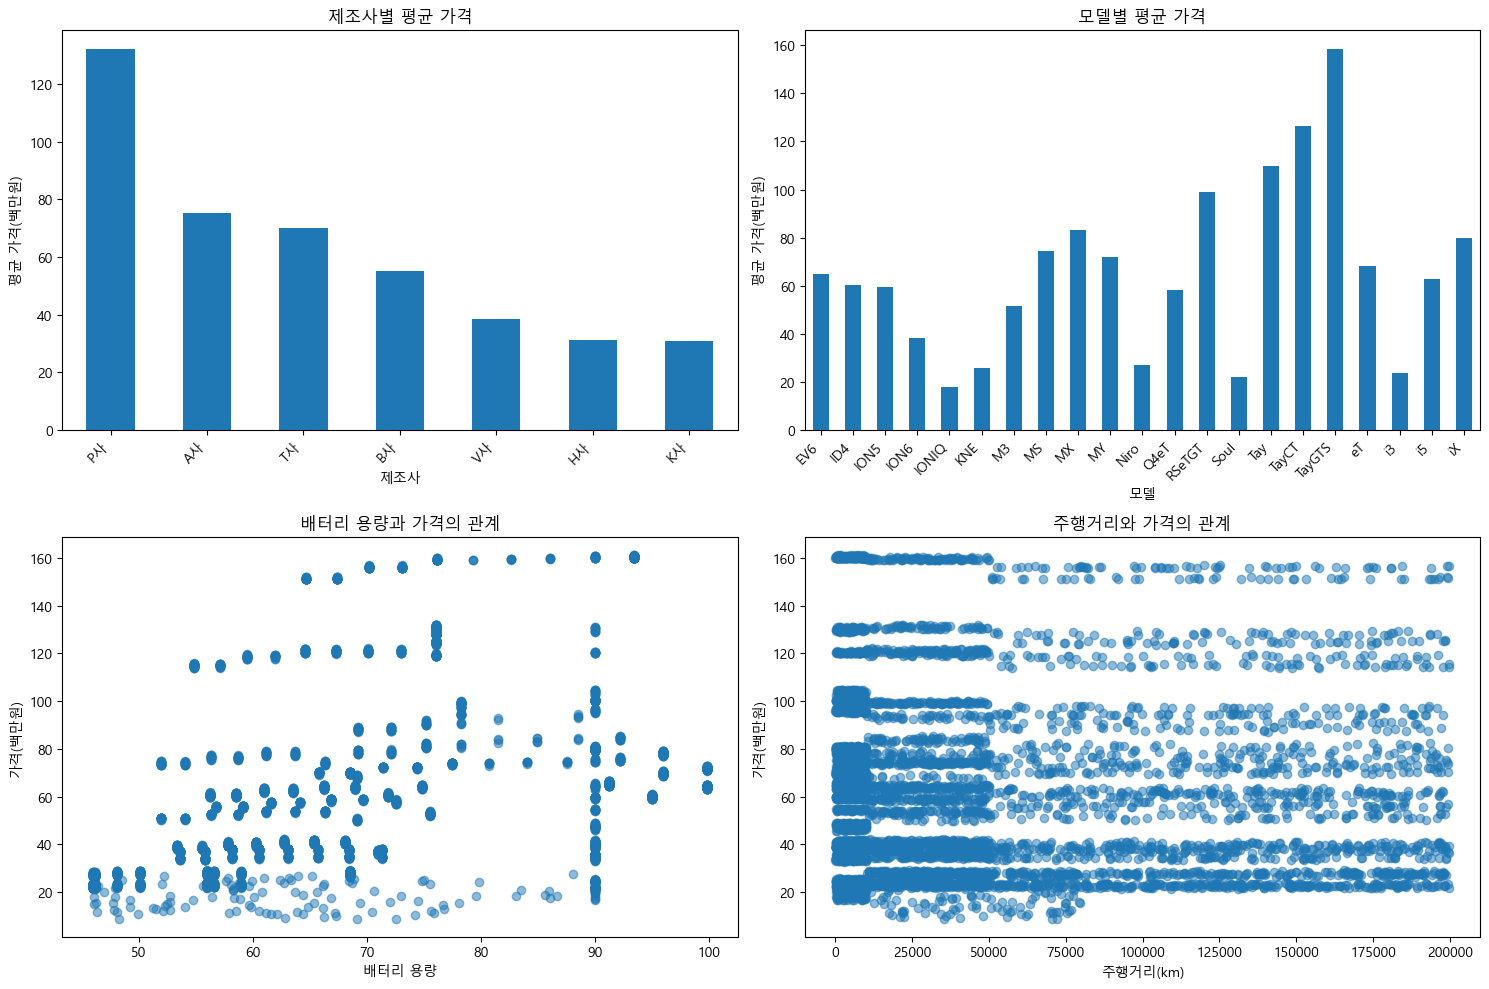

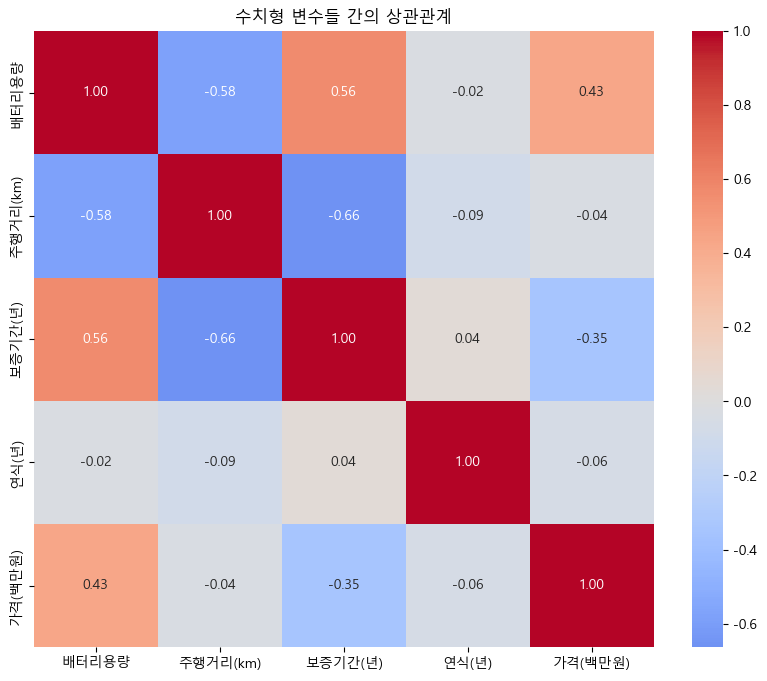

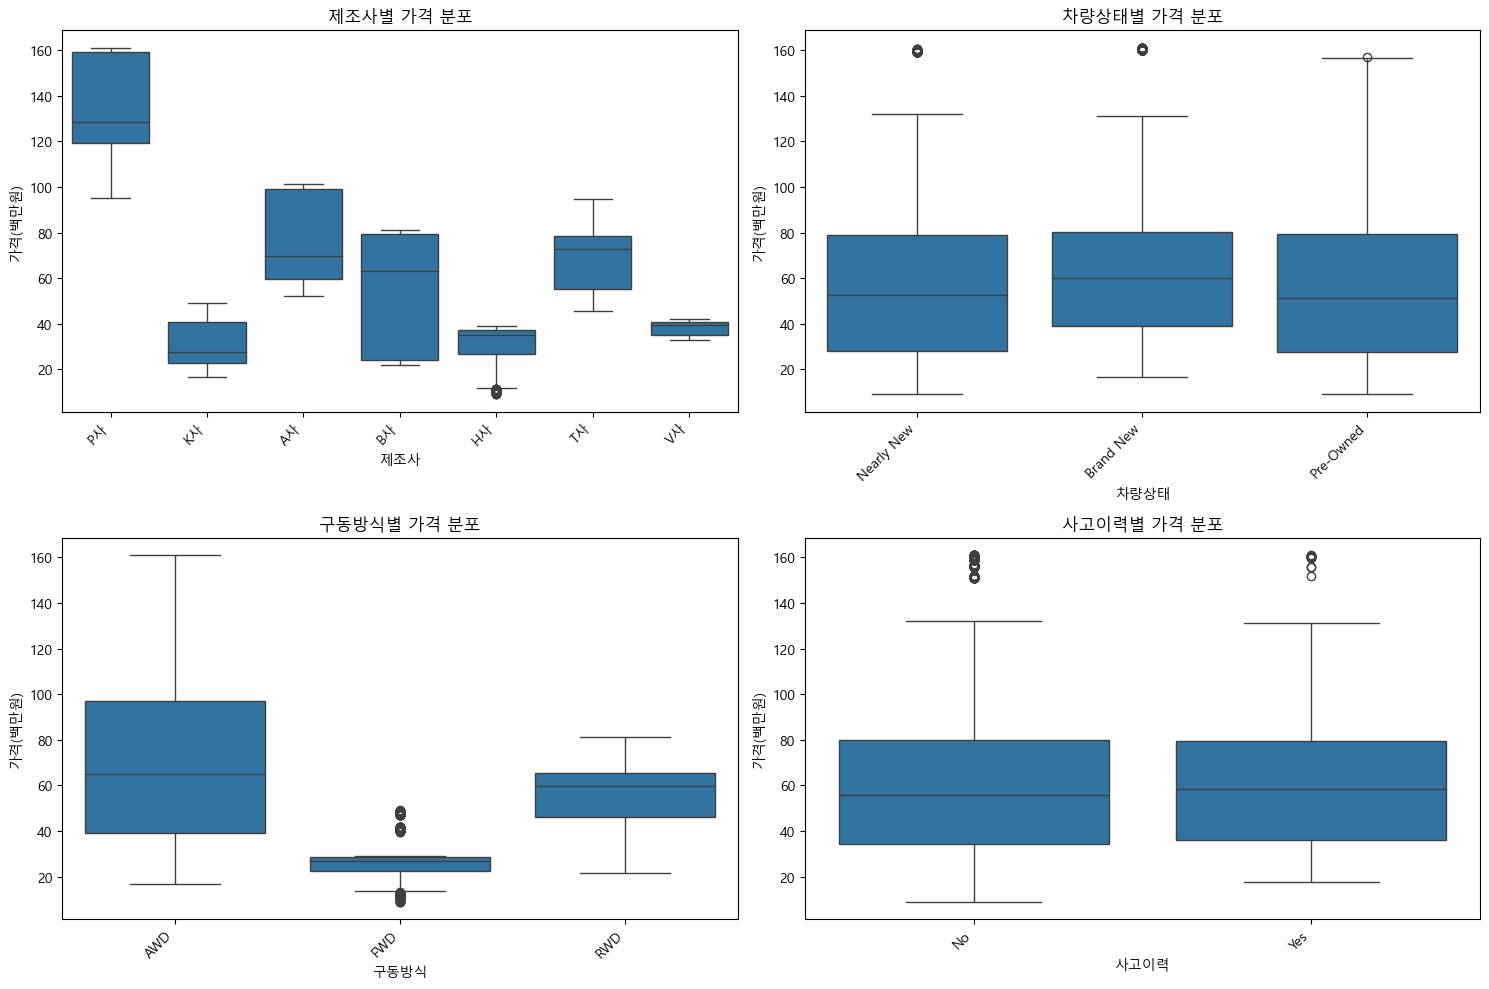

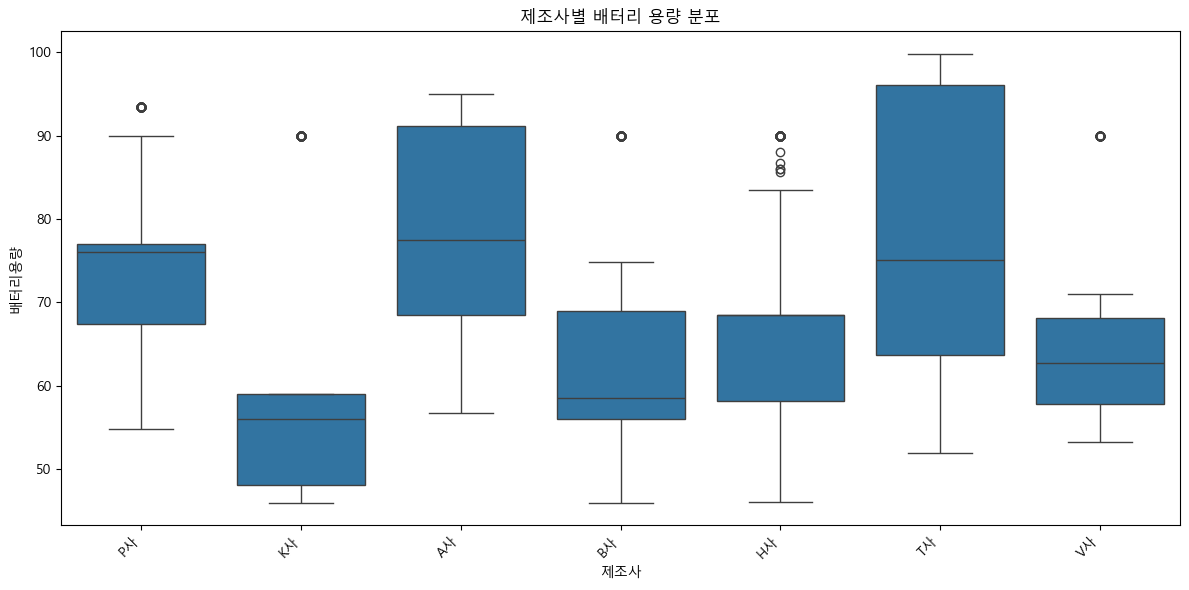

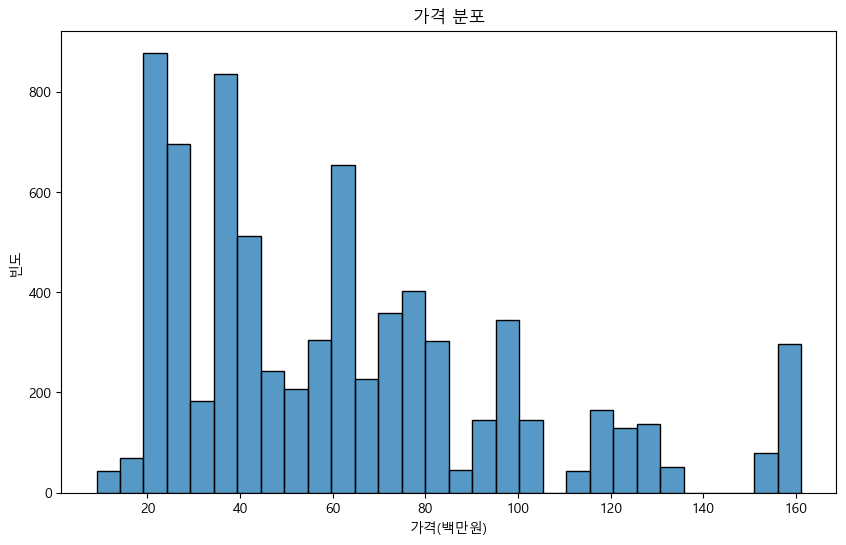


=== 사고이력에 따른 평균 가격 ===
           mean  count
사고이력                  
No    62.294824   7154
Yes   63.106268    343

=== 제조사별 차량 수 ===
제조사
H사    1237
B사    1169
K사    1164
A사    1142
T사    1109
P사    1071
V사     605
Name: count, dtype: int64


In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# 한글 폰트 설정
import matplotlib.font_manager as fm
import platform

# 운영체제별 폰트 설정
if platform.system() == 'Darwin':  # Mac OS
    plt.rc('font', family='AppleGothic')
elif platform.system() == 'Windows':  # Windows
    plt.rc('font', family='Malgun Gothic')
    
plt.rc('axes', unicode_minus=False)  # 마이너스 기호 깨짐 방지

# 데이터 읽기
df = pd.read_csv('train.csv', encoding='utf-8')

# 기본적인 데이터 탐색
print("=== 데이터 크기 ===")
print(df.shape)
print("\n=== 처음 5개 행 ===")
print(df.head())
print("\n=== 데이터 정보 ===")
print(df.info())
print("\n=== 기술통계량 ===")
print(df.describe())

# 시각화 1: 전반적인 분포와 관계
plt.figure(figsize=(15, 10))


# 1. 제조사별 평균 가격
plt.subplot(2, 2, 1)
avg_price_by_manufacturer = df.groupby('제조사')['가격(백만원)'].mean().sort_values(ascending=False)
avg_price_by_manufacturer.plot(kind='bar')
plt.title('제조사별 평균 가격')
plt.xlabel('제조사')
plt.ylabel('평균 가격(백만원)')
plt.xticks(rotation=45, ha='right')

# 2. 차량상태별 평균 가격
plt.subplot(2, 2, 2)
df.groupby('차량상태')['가격(백만원)'].mean().plot(kind='bar')
plt.title('차량상태별 평균 가격')
plt.xlabel('차량상태')
plt.ylabel('평균 가격(백만원)')
plt.xticks(rotation=45, ha='right')

# 2. 차량상태별 평균 가격
plt.subplot(2, 2, 2)
df.groupby('모델')['가격(백만원)'].mean().plot(kind='bar')
plt.title('모델별 평균 가격')
plt.xlabel('모델')
plt.ylabel('평균 가격(백만원)')
plt.xticks(rotation=45, ha='right')

# 3. 배터리 용량과 가격의 산점도
plt.subplot(2, 2, 3)
plt.scatter(df['배터리용량'], df['가격(백만원)'], alpha=0.5)
plt.xlabel('배터리 용량')
plt.ylabel('가격(백만원)')
plt.title('배터리 용량과 가격의 관계')

# 4. 주행거리와 가격의 산점도
plt.subplot(2, 2, 4)
plt.scatter(df['주행거리(km)'], df['가격(백만원)'], alpha=0.5)
plt.xlabel('주행거리(km)')
plt.ylabel('가격(백만원)')
plt.title('주행거리와 가격의 관계')

plt.tight_layout()
plt.show()

# 시각화 2: 상관관계 히트맵
numeric_columns = df.select_dtypes(include=[np.number]).columns
correlation = df[numeric_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('수치형 변수들 간의 상관관계')
plt.show()

# 시각화 3: 범주형 변수별 가격 분포
categorical_columns = ['제조사', '차량상태', '구동방식', '사고이력']

plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(data=df, x=col, y='가격(백만원)')
    plt.xticks(rotation=45, ha='right')
    plt.title(f'{col}별 가격 분포')

plt.tight_layout()
plt.show()

# 시각화 4: 제조사별 배터리 용량 분포
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='제조사', y='배터리용량')
plt.xticks(rotation=45, ha='right')
plt.title('제조사별 배터리 용량 분포')
plt.tight_layout()
plt.show()

# 시각화 5: 가격 분포 히스토그램
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='가격(백만원)', bins=30)
plt.title('가격 분포')
plt.xlabel('가격(백만원)')
plt.ylabel('빈도')
plt.show()

# 추가 분석: 사고이력에 따른 가격 차이
print("\n=== 사고이력에 따른 평균 가격 ===")
print(df.groupby('사고이력')['가격(백만원)'].agg(['mean', 'count']))

# 제조사별 차량 수
print("\n=== 제조사별 차량 수 ===")
print(df['제조사'].value_counts())

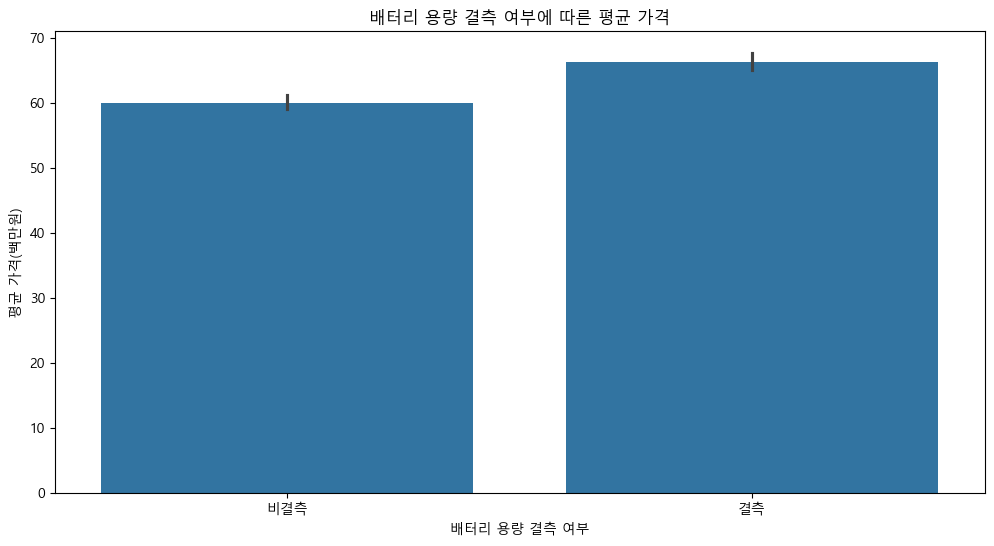

<Figure size 1500x600 with 0 Axes>

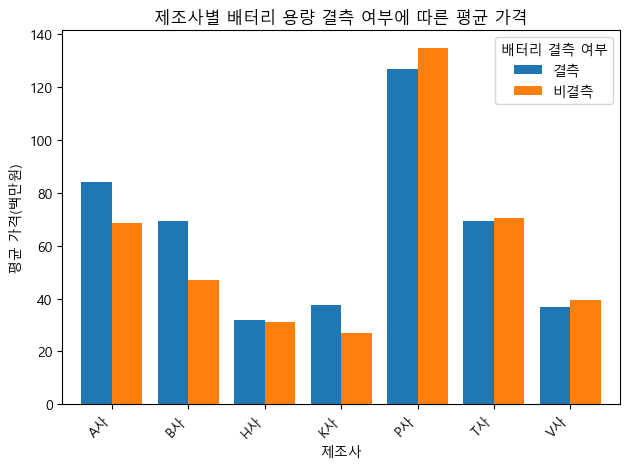


=== 배터리 용량 결측치 통계 ===
              통계        값
0          결측치 수  2711.00
1      결측치 비율(%)    36.16
2   결측 데이터 평균 가격    66.34
3  비결측 데이터 평균 가격    60.06

=== 제조사별 배터리 용량 결측치 비율(%) ===
제조사
A사    42.29
V사    38.02
B사    36.87
K사    36.25
P사    35.39
H사    34.84
T사    30.21
Name: 배터리용량, dtype: float64

=== 배터리 용량 결측 여부에 따른 주요 특성 평균 ===
         가격(백만원)  주행거리(km)  보증기간(년)
배터리결측여부                            
결측         66.34  12408.76     6.75
비결측        60.06  62345.77     3.95

=== 배터리 용량 결측 여부와 차량상태의 관계 ===
배터리결측여부        결측    비결측
차량상태                    
Brand New   85.13  22.40
Nearly New  10.37  37.15
Pre-Owned    4.50  40.45


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 한글 폰트 설정
import platform

if platform.system() == 'Darwin':  # Mac OS
    plt.rc('font', family='AppleGothic')
elif platform.system() == 'Windows':  # Windows
    plt.rc('font', family='Malgun Gothic')
    
plt.rc('axes', unicode_minus=False)  # 마이너스 기호 깨짐 방지

# 데이터 읽기
df = pd.read_csv('train.csv', encoding='utf-8')

# 배터리 용량 결측치 여부에 따른 그룹 생성
df['배터리결측여부'] = df['배터리용량'].isna().map({True: '결측', False: '비결측'})

# 1. 전체 차량의 배터리 결측 여부에 따른 평균 가격
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='배터리결측여부', y='가격(백만원)')
plt.title('배터리 용량 결측 여부에 따른 평균 가격')
plt.xlabel('배터리 용량 결측 여부')
plt.ylabel('평균 가격(백만원)')
plt.show()

# 2. 제조사별 배터리 결측 여부에 따른 평균 가격
plt.figure(figsize=(15, 6))
avg_price = df.groupby(['제조사', '배터리결측여부'])['가격(백만원)'].mean().unstack()
avg_price.plot(kind='bar', width=0.8)
plt.title('제조사별 배터리 용량 결측 여부에 따른 평균 가격')
plt.xlabel('제조사')
plt.ylabel('평균 가격(백만원)')
plt.legend(title='배터리 결측 여부')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 3. 결측치 통계 출력
print("\n=== 배터리 용량 결측치 통계 ===")
stats_dict = {
    '통계': ['결측치 수', '결측치 비율(%)', '결측 데이터 평균 가격', '비결측 데이터 평균 가격'],
    '값': [
        df['배터리용량'].isna().sum(),
        round(df['배터리용량'].isna().mean() * 100, 2),
        round(df[df['배터리용량'].isna()]['가격(백만원)'].mean(), 2),
        round(df[~df['배터리용량'].isna()]['가격(백만원)'].mean(), 2)
    ]
}
missing_stats = pd.DataFrame(stats_dict)
print(missing_stats)

# 4. 제조사별 결측치 비율
print("\n=== 제조사별 배터리 용량 결측치 비율(%) ===")
manufacturer_missing = df.groupby('제조사')['배터리용량'].apply(lambda x: round(x.isna().mean() * 100, 2)).sort_values(ascending=False)
print(manufacturer_missing)

# 5. 결측치와 다른 변수들과의 관계
print("\n=== 배터리 용량 결측 여부에 따른 주요 특성 평균 ===")
avg_stats = df.groupby('배터리결측여부').agg({
    '가격(백만원)': 'mean',
    '주행거리(km)': 'mean',
    '보증기간(년)': 'mean'
}).round(2)
print(avg_stats)

# 6. 결측치와 차량상태의 관계
print("\n=== 배터리 용량 결측 여부와 차량상태의 관계 ===")
status_missing = pd.crosstab(df['차량상태'], df['배터리결측여부'], normalize='columns') * 100
print(status_missing.round(2))

C:\Users\Admin\AppData\Local\Temp\ipykernel_10304\3582697916.py:38: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')


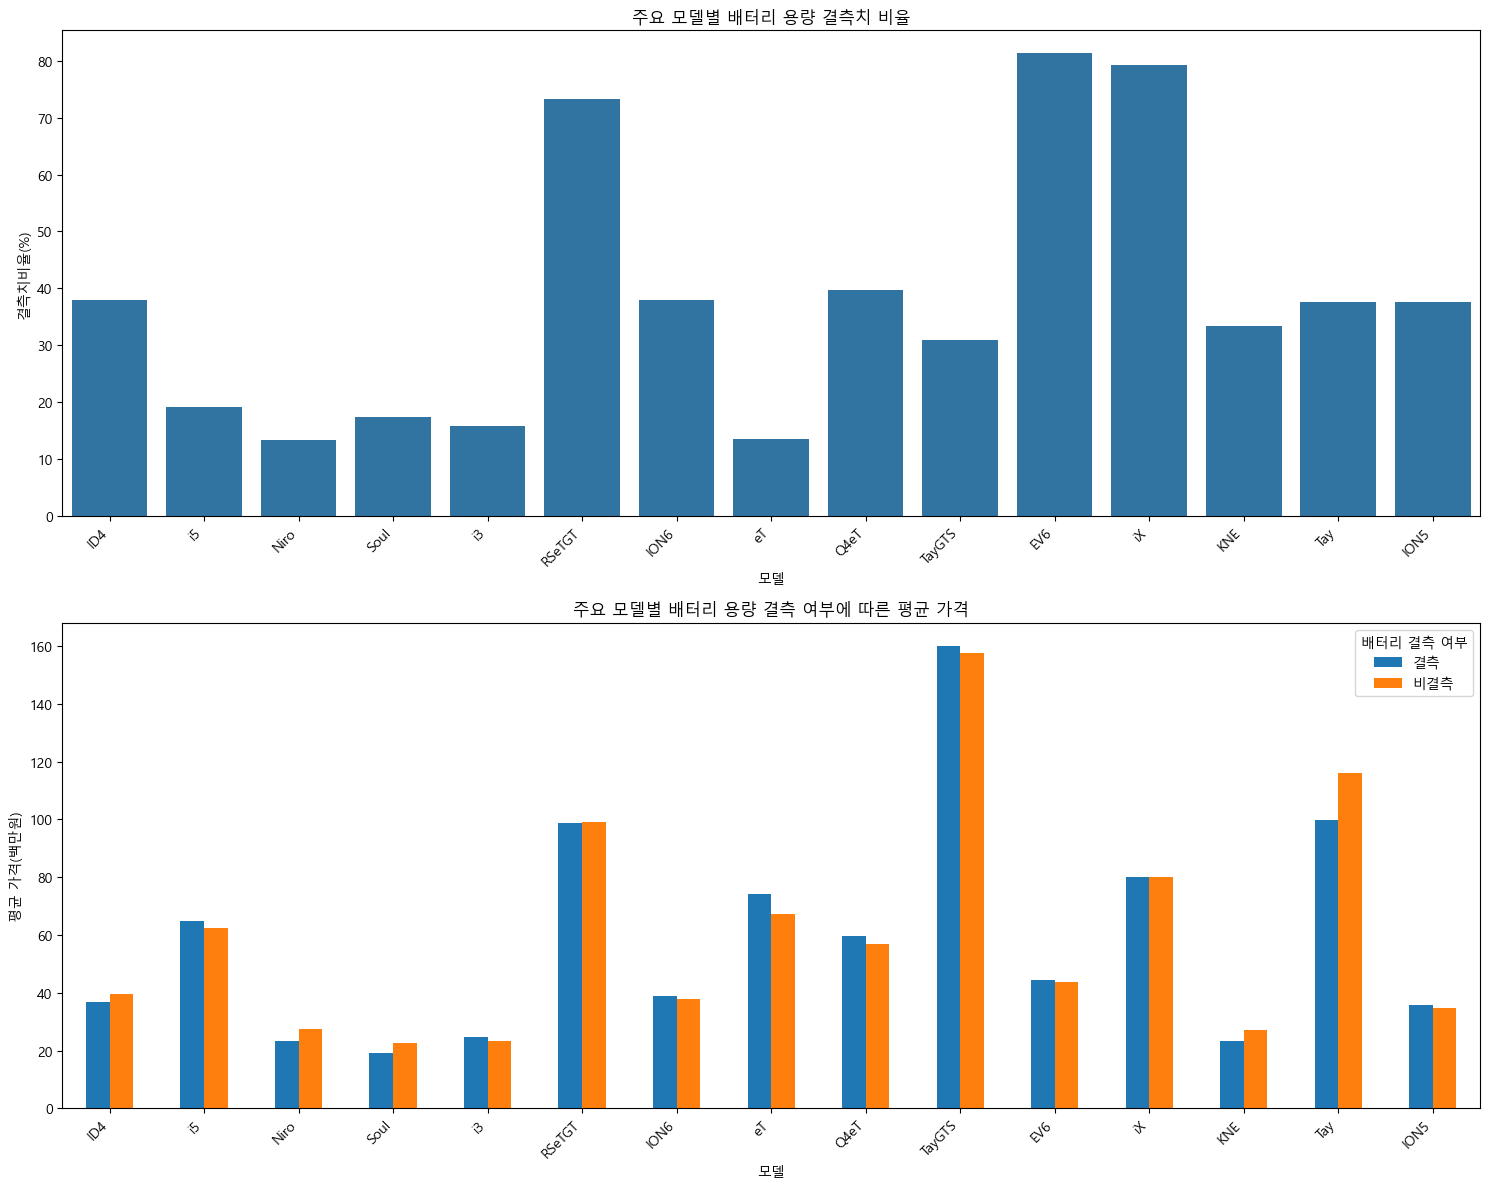


=== 모델별 배터리 용량 결측치 통계 (상위 15개 모델) ===
        결측치비율(%)  평균가격(백만원)  데이터수
모델                               
ID4        38.02      38.41   605
i5         19.08      62.87   414
Niro       13.32      26.97   398
Soul       17.38      22.12   397
i3         15.72      23.56   388
RSeTGT     73.25      98.80   385
ION6       37.99      38.10   379
eT         13.46      68.10   379
Q4eT       39.68      58.07   378
TayGTS     30.93     158.30   375
EV6        81.30      44.20   369
iX         79.29      80.03   367
KNE        33.42      25.74   365
Tay        37.67     109.93   361
ION5       37.68      35.07   353

=== 주요 모델별 결측치 현황 (데이터 수 10개 이상) ===
            결측치비율(%)  데이터수    평균가격
제조사 모델                            
K사  EV6        81.30   369   44.20
B사  iX         79.29   367   80.03
A사  RSeTGT     73.25   385   98.80
    Q4eT       39.68   378   58.07
T사  M3         39.43   279   51.63
    MY         38.06   289   72.05
V사  ID4        38.02   605   38.41
H사  ION6       37.99   379   3

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 한글 폰트 설정
import platform

if platform.system() == 'Darwin':  # Mac OS
    plt.rc('font', family='AppleGothic')
elif platform.system() == 'Windows':  # Windows
    plt.rc('font', family='Malgun Gothic')
    
plt.rc('axes', unicode_minus=False)  # 마이너스 기호 깨짐 방지

# 데이터 읽기
df = pd.read_csv('train.csv', encoding='utf-8')

# 배터리 용량 결측치 여부에 따른 그룹 생성
df['배터리결측여부'] = df['배터리용량'].isna().map({True: '결측', False: '비결측'})

# 1. 모델별 기본 통계
model_stats = pd.DataFrame({
    '결측치비율(%)': df.groupby('모델')['배터리용량'].apply(lambda x: x.isna().mean() * 100),
    '평균가격(백만원)': df.groupby('모델')['가격(백만원)'].mean(),
    '데이터수': df.groupby('모델').size()
}).round(2)

# 데이터 수로 정렬하고 상위 15개 선택
top_models = model_stats.nlargest(15, '데이터수')

# 2. 시각화
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 12))

# 결측치 비율 그래프
sns.barplot(data=top_models.reset_index(), x='모델', y='결측치비율(%)', ax=ax1)
ax1.set_title('주요 모델별 배터리 용량 결측치 비율')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')

# 결측 여부에 따른 평균 가격 비교
model_price_by_missing = df.pivot_table(
    values='가격(백만원)',
    index='모델',
    columns='배터리결측여부',
    aggfunc='mean'
).round(2)

# 상위 15개 모델에 대해서만 표시
model_price_by_missing = model_price_by_missing.loc[top_models.index]
model_price_by_missing.plot(kind='bar', ax=ax2)
ax2.set_title('주요 모델별 배터리 용량 결측 여부에 따른 평균 가격')
ax2.set_xlabel('모델')
ax2.set_ylabel('평균 가격(백만원)')
ax2.legend(title='배터리 결측 여부')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()

# 3. 결과 출력
print("\n=== 모델별 배터리 용량 결측치 통계 (상위 15개 모델) ===")
print(top_models)

# 4. 제조사-모델 조합별 결측치 분석
manufacturer_model_stats = pd.DataFrame({
    '결측치비율(%)': df.groupby(['제조사', '모델'])['배터리용량'].apply(lambda x: x.isna().mean() * 100),
    '데이터수': df.groupby(['제조사', '모델']).size(),
    '평균가격': df.groupby(['제조사', '모델'])['가격(백만원)'].mean()
}).round(2)

# 데이터 수가 10개 이상이고 결측치가 있는 모델만 필터링
significant_models = manufacturer_model_stats[
    (manufacturer_model_stats['데이터수'] >= 10) & 
    (manufacturer_model_stats['결측치비율(%)'] > 0)
].sort_values('결측치비율(%)', ascending=False)

print("\n=== 주요 모델별 결측치 현황 (데이터 수 10개 이상) ===")
print(significant_models)

# 5. 결측치가 있는 모델들의 특성 분석
missing_models = df[df['배터리용량'].isna()]['모델'].unique()
model_characteristics = df[df['모델'].isin(missing_models)].groupby('모델').agg({
    '가격(백만원)': ['mean', 'std'],
    '주행거리(km)': 'mean',
    '연식(년)': 'mean',
    '배터리용량': lambda x: x.isna().mean() * 100  # 결측치 비율
}).round(2)

# 컬럼명 변경
model_characteristics.columns = ['평균가격', '가격표준편차', '평균주행거리', '평균연식', '결측치비율(%)']
model_characteristics['데이터수'] = df[df['모델'].isin(missing_models)].groupby('모델').size()

print("\n=== 결측치가 있는 모델들의 특성 (상위 10개) ===")
print(model_characteristics.sort_values('데이터수', ascending=False).head(10))

# 6. 제조사별 결측치 비율
print("\n=== 제조사별 결측치 비율 ===")
manufacturer_stats = pd.DataFrame({
    '결측치비율(%)': df.groupby('제조사')['배터리용량'].apply(lambda x: x.isna().mean() * 100),
    '데이터수': df.groupby('제조사').size(),
    '평균가격': df.groupby('제조사')['가격(백만원)'].mean()
}).round(2).sort_values('결측치비율(%)', ascending=False)

print(manufacturer_stats)

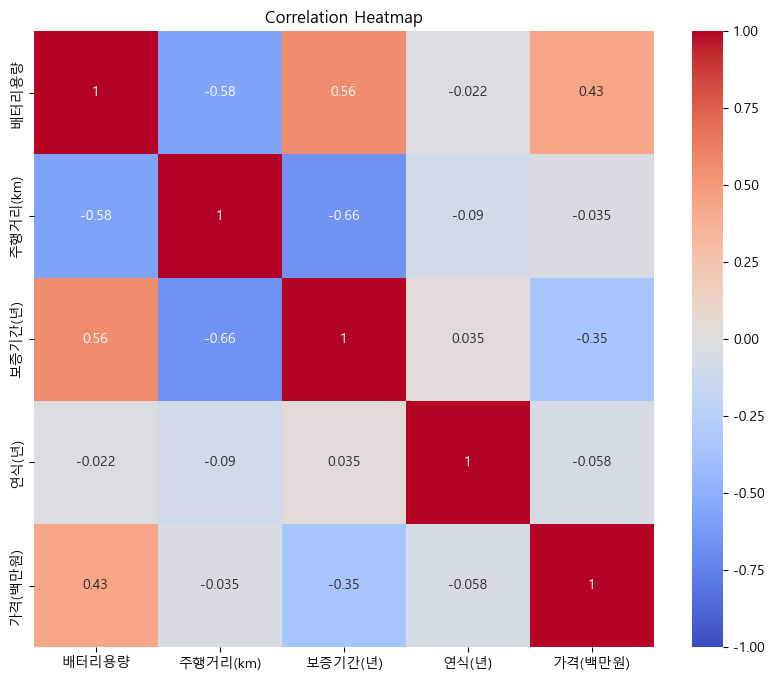

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 불러오기
train = pd.read_csv('./train.csv', encoding='utf-8') 

# 숫자형 칼럼 선택
numeric_cols = ['배터리용량', '주행거리(km)', '보증기간(년)', '연식(년)', '가격(백만원)']
train_numeric = train[numeric_cols]

# 상관도 계산
corr = train_numeric.corr()

# 상관도 히트맵 그리기
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

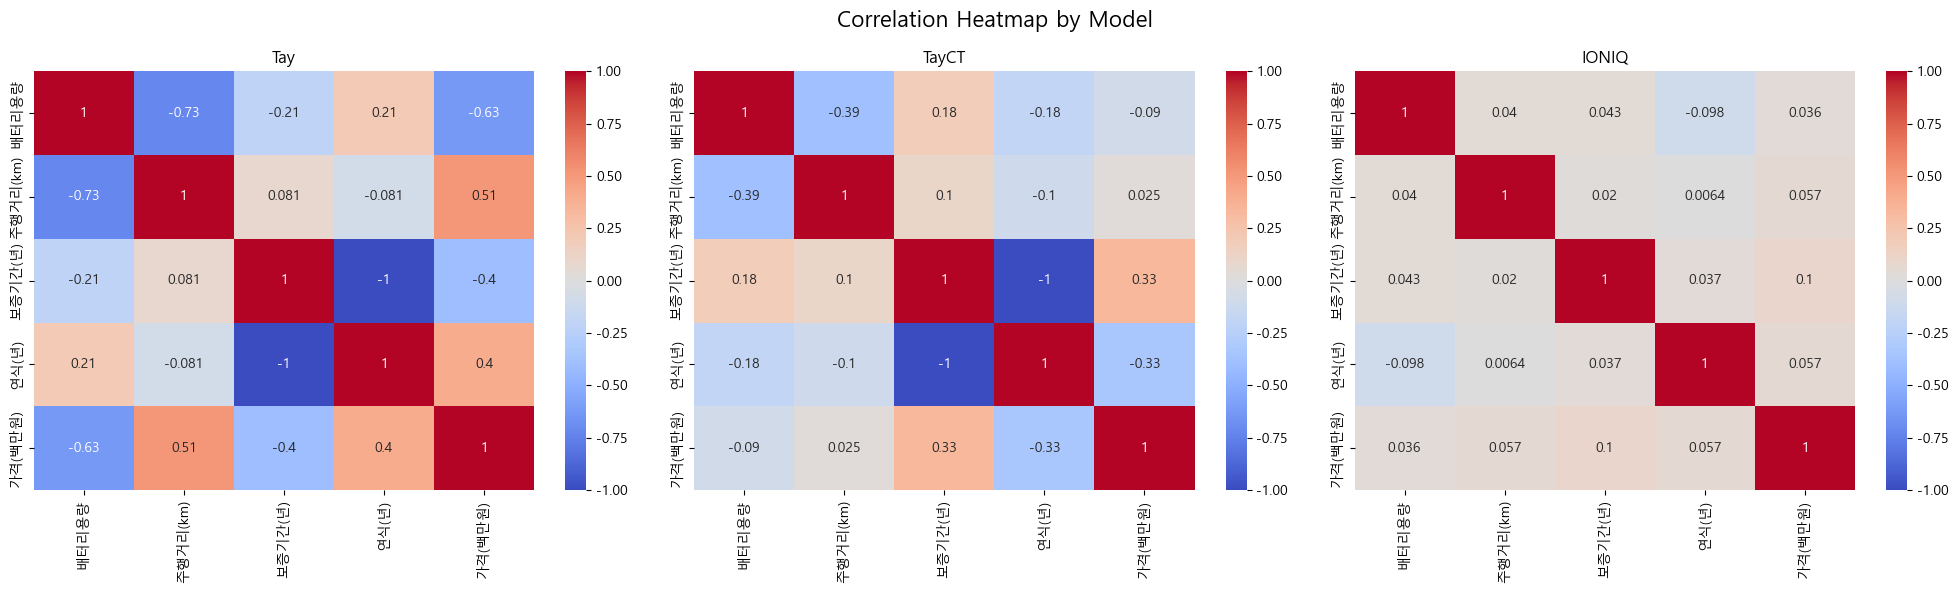

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 불러오기
train = pd.read_csv('./train.csv', encoding='utf-8') 

# 숫자형 칼럼 선택
numeric_cols = ['배터리용량', '주행거리(km)', '보증기간(년)', '연식(년)', '가격(백만원)']

# 모델별로 상관도 히트맵 그리기
models = ['Tay', 'TayCT', 'IONIQ']

fig, axes = plt.subplots(1, 3, figsize=(20, 6))
fig.suptitle('Correlation Heatmap by Model', fontsize=16)

for i, model in enumerate(models):
    # 모델 선택
    train_model = train[train['모델'] == model]
    train_numeric = train_model[numeric_cols]
    
    # 상관도 계산
    corr = train_numeric.corr()
    
    # 상관도 히트맵 그리기
    sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1, ax=axes[i])
    axes[i].set_title(model)

plt.tight_layout()
plt.show()